In [1]:
# Numerical Packages
import numpy as np
import pandas as pd
import math

#Common packages
import copy
from tqdm import tqdm

#System Packages
import sys, os
import importlib
import time

#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

%config InlineBackend. figure_format = 'retina'

In [3]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
Data_High_Level_Features_path =  HOMEPATH + "Data_ML/" +"Data_High_Level_Features/"

process = {
            "herwig_ang_H" : 0,
            "herwig_ang_QCD" : 0,
            "pythia_def_H" : 0,
            "pythia_def_QCD" : 0,
            "pythia_vin_H" : 0,
            "pythia_vin_QCD" : 0,
            "pythia_dip_H" : 0,
            "pythia_dip_QCD" : 0 ,
#             "sherpa_def_H" : 0,
#             "sherpa_def_QCD" : 0
              }  


try:
    
    for element in tqdm(process):
        process[element] = pd.read_csv(Data_High_Level_Features_path + str(element) + ".csv")

        print("{}'s event number: {}".format(element,len(process[element])))
        
    for i, element in enumerate(process):
        total_list = process[element].columns
        break
    
    print("total_list",total_list)

except:
    print("Please go back to `Data_Split.ipynb` notebook.")

 12%|█▎        | 1/8 [00:06<00:44,  6.29s/it]

herwig_ang_H's event number: 999997


 25%|██▌       | 2/8 [00:12<00:37,  6.27s/it]

herwig_ang_QCD's event number: 1000000


 38%|███▊      | 3/8 [00:18<00:30,  6.08s/it]

pythia_def_H's event number: 999996


 50%|█████     | 4/8 [00:23<00:23,  5.90s/it]

pythia_def_QCD's event number: 1000000


 62%|██████▎   | 5/8 [00:29<00:17,  5.76s/it]

pythia_vin_H's event number: 999997


 75%|███████▌  | 6/8 [00:34<00:11,  5.63s/it]

pythia_vin_QCD's event number: 1000000


 88%|████████▊ | 7/8 [00:39<00:05,  5.60s/it]

pythia_dip_H's event number: 1000000


100%|██████████| 8/8 [00:45<00:00,  5.69s/it]

pythia_dip_QCD's event number: 1000000
total_list Index(['GEN', 'SHO', 'PRO', 'MJJ_0', 'delta_eta_0', 'XHH_0', 'MJ1_0', 'PTJ1_0',
       'eta1_0', 'phi1_0', 't211_0', 'D211_0', 'D221_0', 'C211_0', 'C221_0',
       'MJ2_0', 'PTJ2_0', 'eta2_0', 'phi2_0', 't212_0', 'D212_0', 'D222_0',
       'C212_0', 'C222_0', 'MJJ', 'delta_eta', 'XHH', 'MJ1', 'PTJ1', 'eta1',
       'phi1', 't211', 'D211', 'D221', 'C211', 'C221', 'MJ2', 'PTJ2', 'eta2',
       'phi2', 't212', 'D212', 'D222', 'C212', 'C222', 'four_b_tag',
       'three_b_tag', 'two_b_tag', 'eventindex', 'index'],
      dtype='object')


# Cut Flow Table

In [11]:
def ET(pt, m):
    ET = np.sqrt(m**2 + pt**2)
    return  ET

preselection = {
                "Trigger" : np.zeros(len(process)),
                "PT_J1" : np.zeros(len(process)),
                "PT_J2" : np.zeros(len(process)),
                "Eta" : np.zeros(len(process)),
                "M_J" : np.zeros(len(process)),
                "Delta_Eta" : np.zeros(len(process)),
                "MJJ" : np.zeros(len(process)),
                "XHH" : np.zeros(len(process)),
                "four_b_tag" : np.zeros(len(process)),
                "three_b_tag" : np.zeros(len(process)),
                "two_b_tag" : np.zeros(len(process)),
              }


process_selected = {
            "herwig_ang_H" : 0,
            "herwig_ang_QCD" : 0,
            "pythia_def_H" : 0,
            "pythia_def_QCD" : 0,
            "pythia_dip_H" : 0,
            "pythia_dip_QCD" : 0 ,
            "pythia_vin_H" : 0,
            "pythia_vin_QCD" : 0,
#             "sherpa_def_H" : 0,
#             "sherpa_def_QCD" : 0
              }  

"""
Mass Cut and PT cut
"""
#######################
for j , element in enumerate(process):
    tmp = process[element]
    tmp["ET_0"] = ET(tmp["PTJ1_0"], tmp["MJ1_0"])
    
    """
    Trigger
    """
    tmp = tmp[(tmp["ET_0"] > 420) & (tmp["MJ1_0"] > 35)]
    preselection["Trigger"][j] = len(tmp)/len(process[element])
    
    """
    PT(J1) > 450 GeV 
    """
    
    tmp = tmp[(tmp["PTJ1_0"] > 450)]
    preselection["PT_J1"][j] = len(tmp)/len(process[element])
    
    """
    PT(J2) > 250 GeV 
    """
    
    tmp = tmp[(tmp["PTJ2_0"] > 250)]
    preselection["PT_J2"][j] = len(tmp)/len(process[element])
    
    """
    |Eta(J1)| < 2 & |Eta(J2)| < 2 
    """
    
    tmp = tmp[(abs(tmp["eta1_0"]) < 2) & (abs(tmp["eta2_0"]) < 2)]
    preselection["Eta"][j] = len(tmp)/len(process[element])
    
    """
    M(J1) > 50 GeV &  M(J2) > 50 GeV
    """
    
    tmp = tmp[(tmp["MJ1_0"] > 50) & (tmp["MJ2_0"] > 50)]
    preselection["M_J"][j] = len(tmp)/len(process[element])
    
    """
    |Delta[Eta(J1),Eta(J2)]| < 1.3
    """
    
    tmp = tmp[(abs(tmp["delta_eta_0"]) < 1.3)]
    preselection["Delta_Eta"][j] = len(tmp)/len(process[element])
    
#     """
#     M(J1,J2) > 700 GeV
#     """
    
#     tmp = tmp[(tmp["MJJ_0"] > 700)]
#     preselection["MJJ"][j] = len(tmp)/len(process[element])
    
#     """
#     X(H,H) < 1.6
#     """
    
#     tmp = tmp[(tmp["XHH_0"] < 1.6)]
#     preselection["XHH"][j] = len(tmp)/len(process[element])

#     """
#     4b-tag 
#     """
    
#     tmp = tmp[(tmp["four_b_tag"] == 1)]
#     preselection["four_b_tag"][j] = len(tmp)/len(process[element])
    
#     """
#     3b-tag 
#     """
    
#     tmp = tmp[(tmp["three_b_tag"] == 1)]
#     preselection["three_b_tag"][j] = len(tmp)/len(process[element])
    
#     """
#     2b-tag 
#     """
    
#     tmp = tmp[(tmp["two_b_tag"] == 1)]
#     preselection["two_b_tag"][j] = len(tmp)/len(process[element])
    
    process_selected[element] = tmp
#######################




print("\r")
print("Preselection Efficiency")
print("\r")
print("{:^10}{:^10}{:^10}{:^10}{:^10}{:^10}{:^10}{:^10}{:^10}".format("","h_ang_H","h_ang_QCD","p_def_H","p_def_QCD","p_dip_H", "p_dip_QCD", "p_vin_H", "p_vin_QCD"))

print("\r")
for element in preselection:
    tmp = preselection[element]
    print("{:^10}{:^10.3f}{:^10.3f}{:^10.3f}{:^10.3f}{:^10.3f}{:^10.3f}{:^10.3f}{:^10.3f}".format(str(element),tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7]))






Preselection Efficiency

           h_ang_H  h_ang_QCD  p_def_H  p_def_QCD  p_dip_H  p_dip_QCD  p_vin_H  p_vin_QCD 

 Trigger    0.640     0.676     0.659     0.713     0.653     0.635     0.632     0.628   
  PT_J1     0.476     0.444     0.506     0.512     0.497     0.418     0.467     0.383   
  PT_J2     0.472     0.429     0.501     0.495     0.493     0.403     0.464     0.371   
   Eta      0.456     0.402     0.483     0.461     0.475     0.377     0.450     0.351   
   M_J      0.448     0.360     0.465     0.393     0.457     0.305     0.440     0.290   
Delta_Eta   0.425     0.254     0.427     0.276     0.421     0.215     0.417     0.206   
   MJJ      0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
   XHH      0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
four_b_tag  0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
three_b_tag  0.000     0.000     0.000     0.000     0.000     

In [12]:
class Samples:
    def __init__(self,\
                 herwig_ang_H,pythia_def_H,\
                 pythia_vin_H,pythia_dip_H,\
                 herwig_ang_QCD,pythia_def_QCD,\
                 pythia_vin_QCD,pythia_dip_QCD,\
                 four_b_tag=False,\
                 three_b_tag=False,\
                 two_b_tag=False,\
                ):
        
        
        
        
        if four_b_tag == True:
            self.herwig_ang_H = herwig_ang_H[herwig_ang_H["four_b_tag"]==1]
            self.herwig_ang_QCD = herwig_ang_QCD[herwig_ang_QCD["four_b_tag"]==1]
            self.pythia_def_H = pythia_def_H[pythia_def_H["four_b_tag"]==1]
            self.pythia_def_QCD = pythia_def_QCD[pythia_def_QCD["four_b_tag"]==1]
            self.pythia_vin_H = pythia_vin_H[pythia_vin_H["four_b_tag"]==1]
            self.pythia_vin_QCD = pythia_vin_QCD[pythia_vin_QCD["four_b_tag"]==1]
            self.pythia_dip_H = pythia_dip_H[pythia_dip_H["four_b_tag"]==1]
            self.pythia_dip_QCD = pythia_dip_QCD[pythia_dip_QCD["four_b_tag"]==1]
            
        elif three_b_tag == True:
            self.herwig_ang_H = herwig_ang_H[herwig_ang_H["three_b_tag"]==1]
            self.herwig_ang_QCD = herwig_ang_QCD[herwig_ang_QCD["three_b_tag"]==1]
            self.pythia_def_H = pythia_def_H[pythia_def_H["three_b_tag"]==1]
            self.pythia_def_QCD = pythia_def_QCD[pythia_def_QCD["three_b_tag"]==1]
            self.pythia_vin_H = pythia_vin_H[pythia_vin_H["three_b_tag"]==1]
            self.pythia_vin_QCD = pythia_vin_QCD[pythia_vin_QCD["three_b_tag"]==1]
            self.pythia_dip_H = pythia_dip_H[pythia_dip_H["three_b_tag"]==1]
            self.pythia_dip_QCD = pythia_dip_QCD[pythia_dip_QCD["three_b_tag"]==1]
        
        elif two_b_tag == True:
            self.herwig_ang_H = herwig_ang_H[herwig_ang_H["two_b_tag"]==1]
            self.herwig_ang_QCD = herwig_ang_QCD[herwig_ang_QCD["two_b_tag"]==1]
            self.pythia_def_H = pythia_def_H[pythia_def_H["two_b_tag"]==1]
            self.pythia_def_QCD = pythia_def_QCD[pythia_def_QCD["two_b_tag"]==1]
            self.pythia_vin_H = pythia_vin_H[pythia_vin_H["two_b_tag"]==1]
            self.pythia_vin_QCD = pythia_vin_QCD[pythia_vin_QCD["two_b_tag"]==1]
            self.pythia_dip_H = pythia_dip_H[pythia_dip_H["two_b_tag"]==1]
            self.pythia_dip_QCD = pythia_dip_QCD[pythia_dip_QCD["two_b_tag"]==1]
            
        else:
            self.herwig_ang_H = herwig_ang_H
            self.pythia_def_H = pythia_def_H
            self.pythia_vin_H = pythia_vin_H
            self.pythia_dip_H = pythia_dip_H
            self.herwig_ang_QCD = herwig_ang_QCD
            self.pythia_def_QCD = pythia_def_QCD
            self.pythia_vin_QCD = pythia_vin_QCD
            self.pythia_dip_QCD = pythia_dip_QCD
        
    def H_only(self,feature):
        H = [self.herwig_ang_H[feature],self.pythia_def_H[feature],self.pythia_vin_H[feature],self.pythia_dip_H[feature]]
        return H
    
    def QCD_only(self,feature):
        QCD = [self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature],self.pythia_vin_QCD[feature],self.pythia_dip_QCD[feature]]
        return QCD
    
    def H_QCD(self,feature):
        Both = [self.herwig_ang_H[feature],self.pythia_def_H[feature],self.pythia_vin_H[feature],self.pythia_dip_H[feature],
               self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature],self.pythia_vin_QCD[feature],self.pythia_dip_QCD[feature]
              ]
        return Both
    

In [13]:
# TotalSamples = Samples(herwig_ang_H,pythia_def_H,pythia_vin_H,herwig_ang_QCD,pythia_def_QCD,pythia_vin_QCD)

TotalSamples = Samples(process_selected["herwig_ang_H"],process_selected["pythia_def_H"],
                       process_selected["pythia_vin_H"],process_selected["pythia_dip_H"],
                       process_selected["herwig_ang_QCD"],process_selected["pythia_def_QCD"],
                       process_selected["pythia_vin_QCD"],process_selected["pythia_dip_QCD"],
                       four_b_tag = 0,
                       three_b_tag = 0,
                       two_b_tag = 0,
                      )

In [14]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)


title = ["Herwig angular (H->hh)","Pythia default (H->hh)","Pythia vincia (H->hh)","Pythia dipole (H->hh)",
         "Herwig angular(QCD)", "Pythia default(QCD)", "Pythia vincia(QCD)" , "Pythia dipole(QCD)"
        ]
colors = ["green","red","blue","purple",
          "cyan","black","Orange","lightblue"
         ]


linestyle = ["-","-.",":","--",
             "--","o","v",":"
            ]

# title = [
#           "Pythia default (H->hh)",
#           "Pythia default(QCD)"
#         ]
# colors = [
#           "green",
#           "red"
#          ]


# linestyle = [
#              "-","-."
#             ]


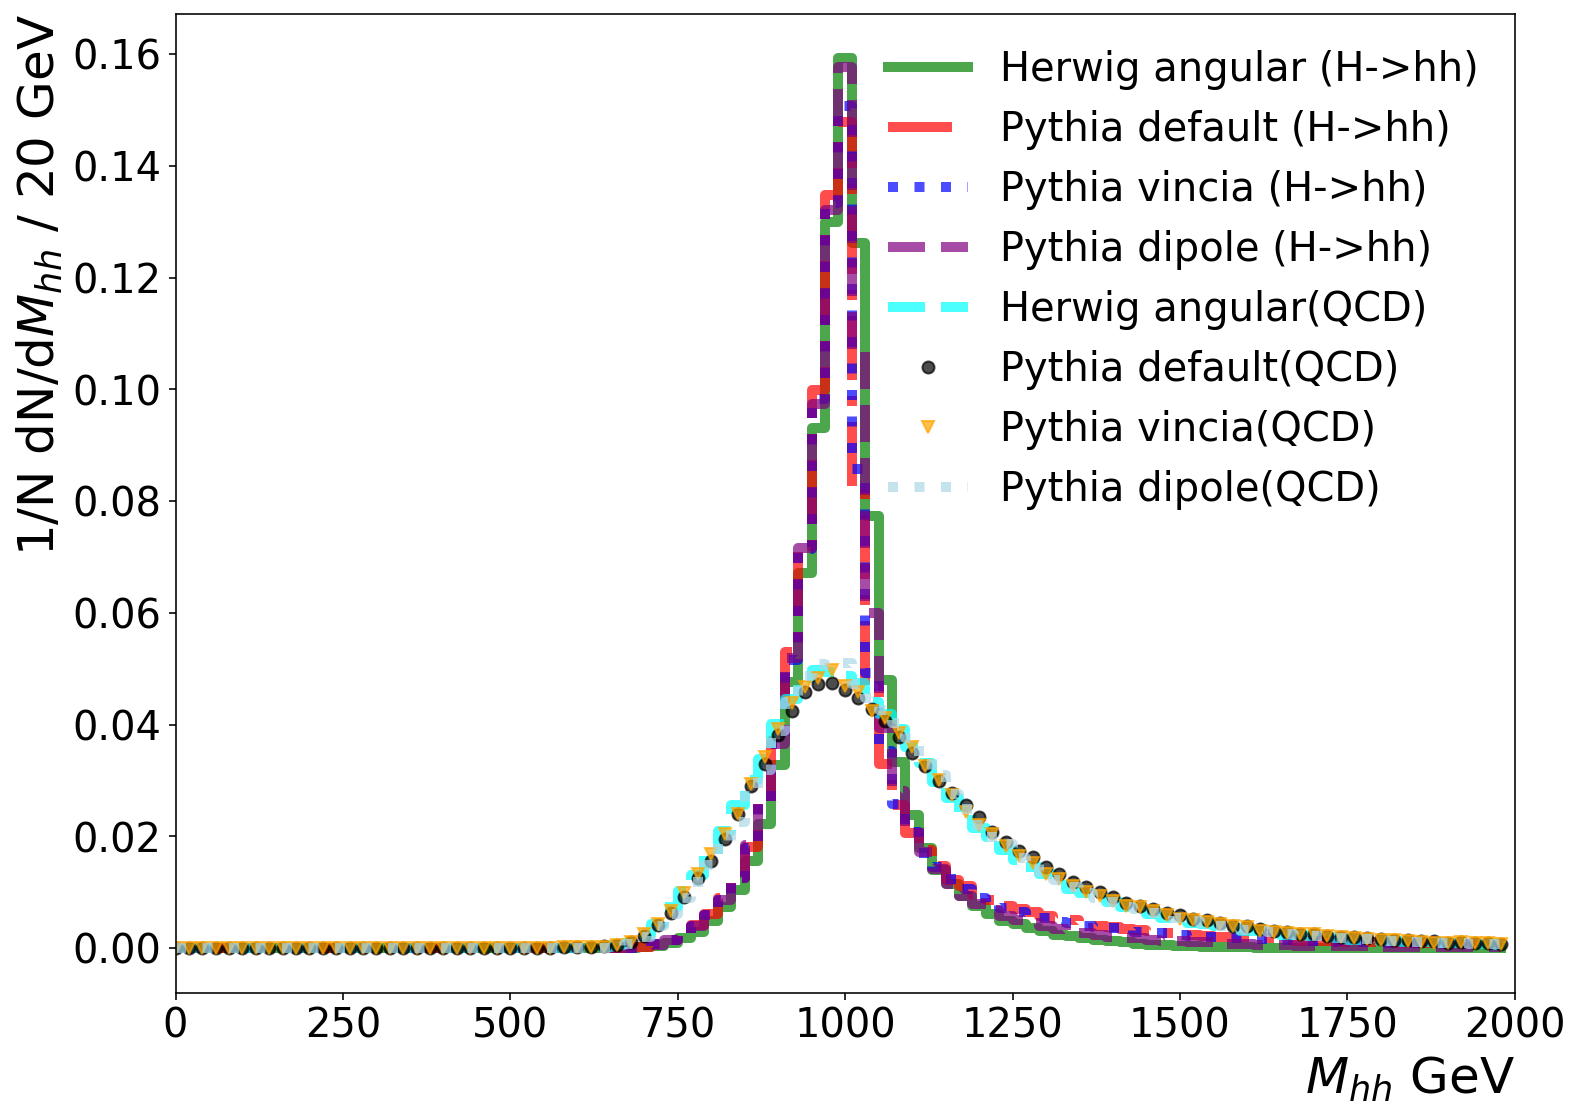

In [16]:
Mjj= TotalSamples.H_QCD("MJJ_0")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, element in enumerate(Mjj):
    length = np.linspace(0,2000,101)
    HIST(element, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.xlim((0,2000))
    plt.xlabel("$M_{hh}$ GeV", fontsize=25,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.yscale("log")
plt.ylabel("1/N dN/d$M_{hh}$ / 20 GeV", fontsize=25, horizontalalignment='right',y=1)
# plt.savefig("../Figures/m_hh_ihtmin_850.pdf", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()   

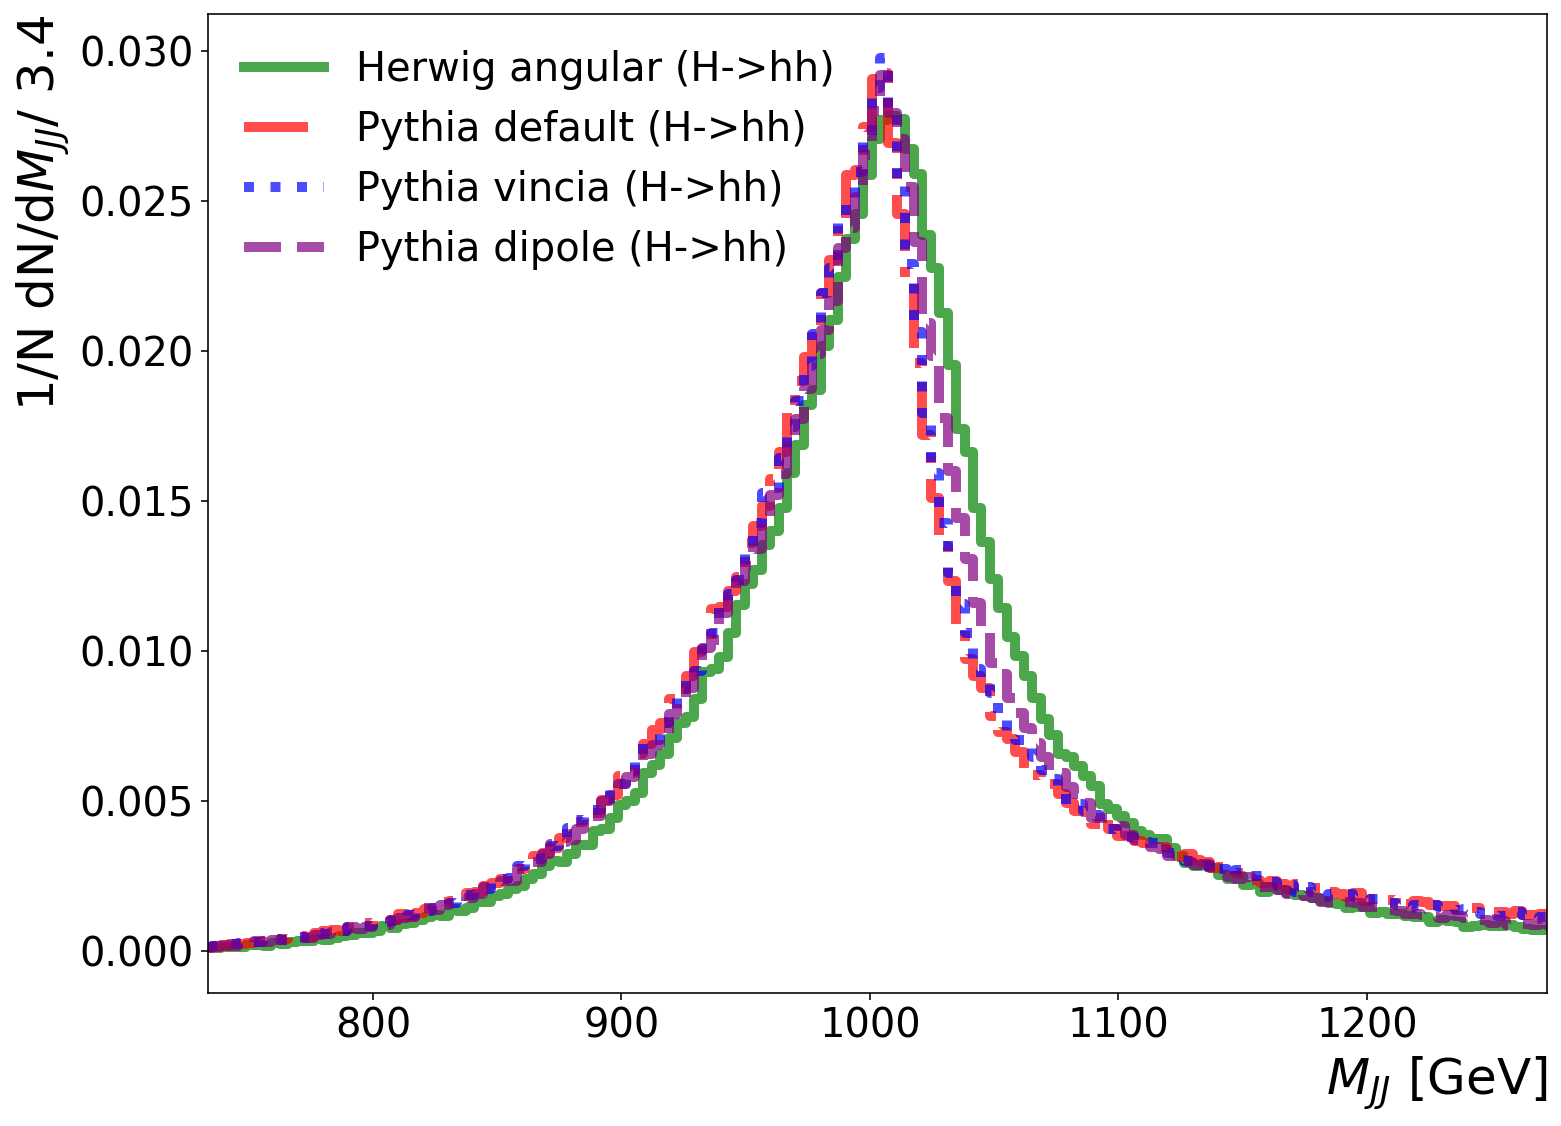

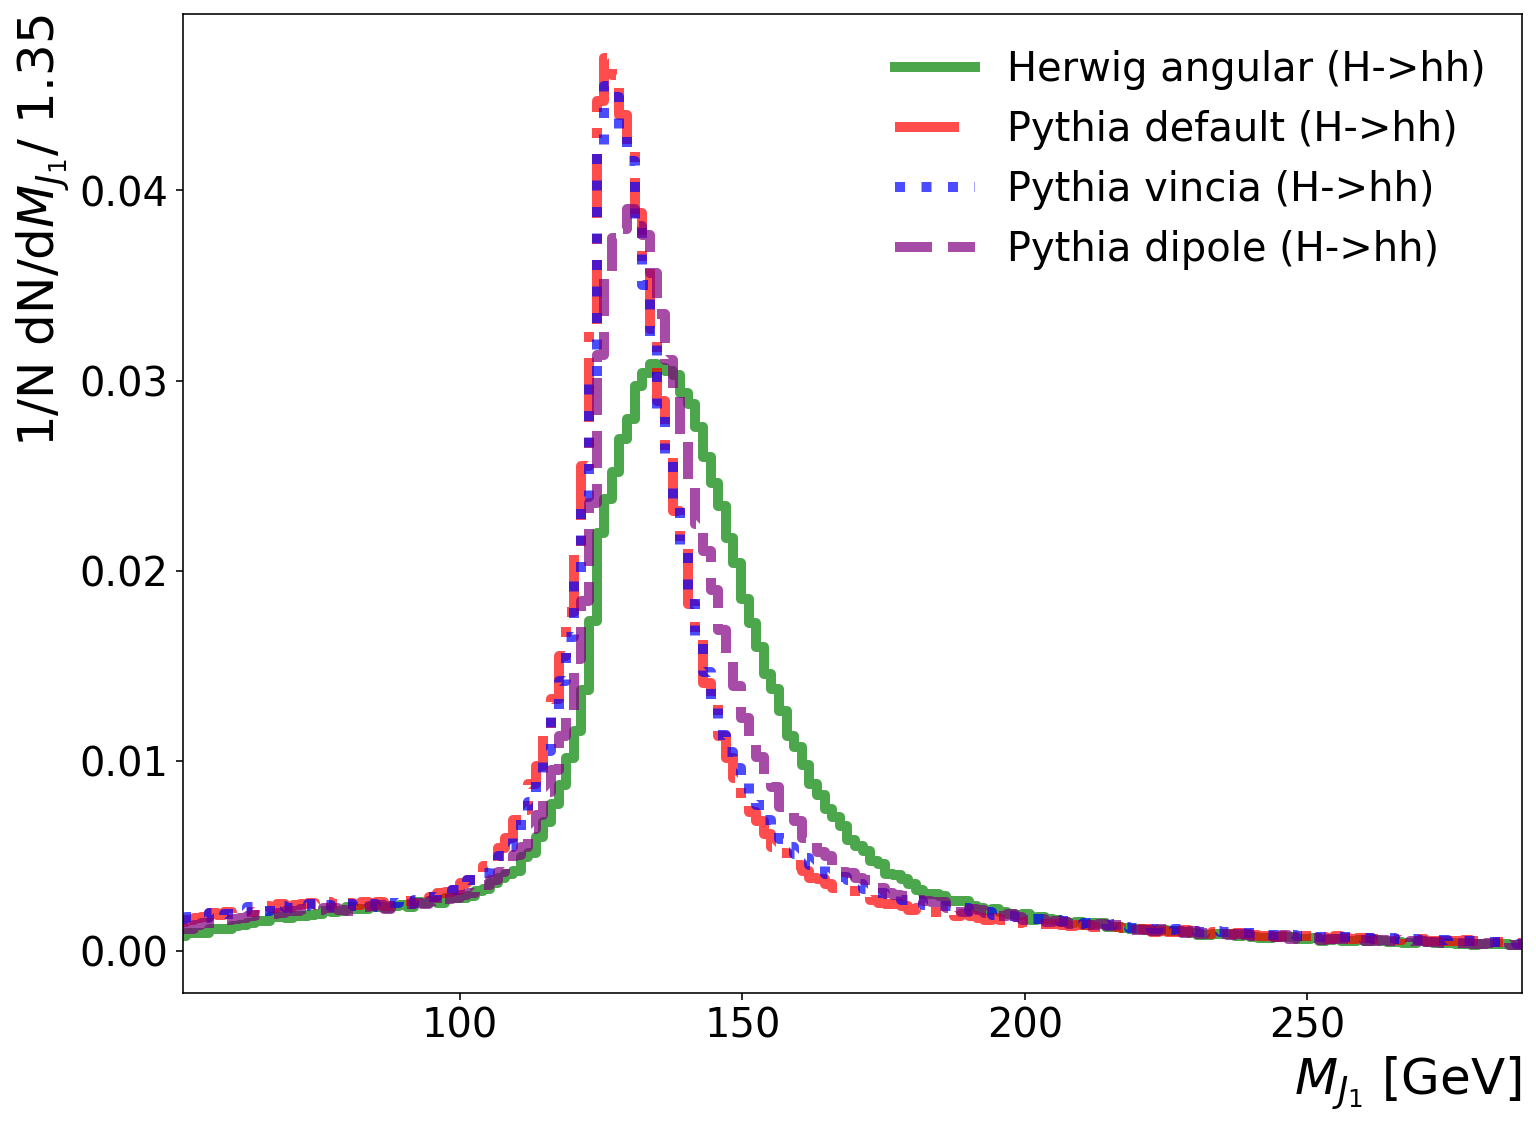

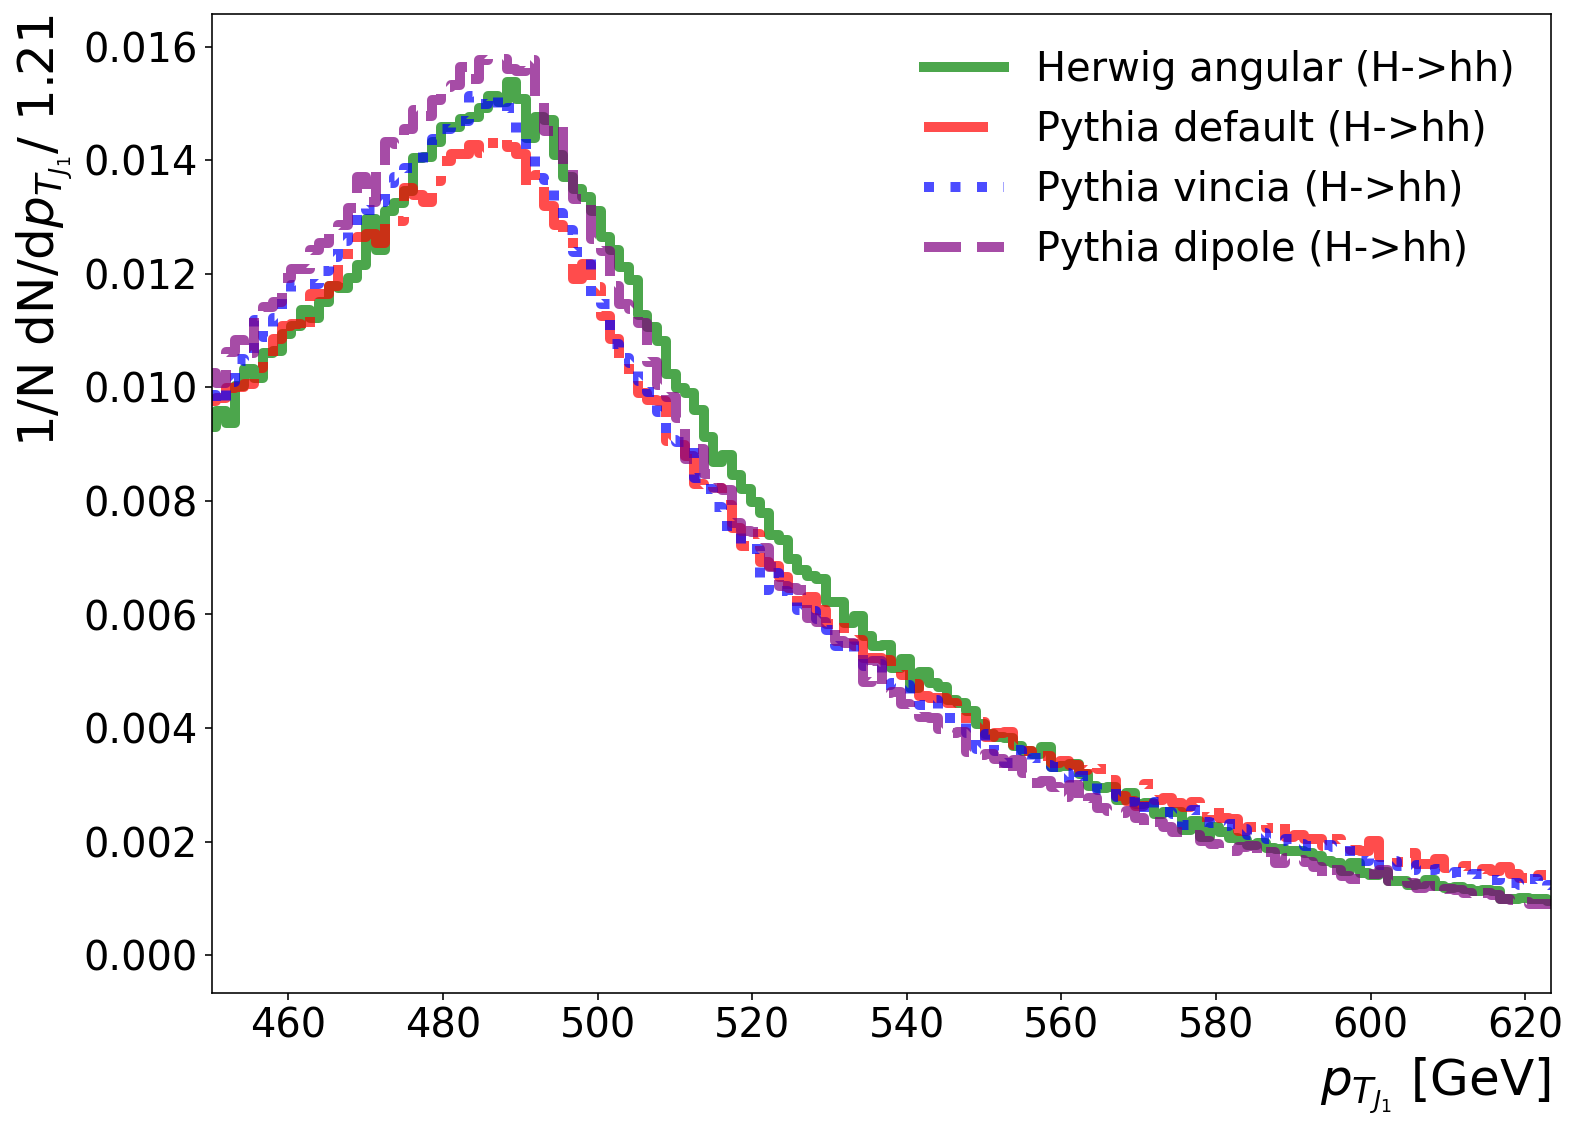

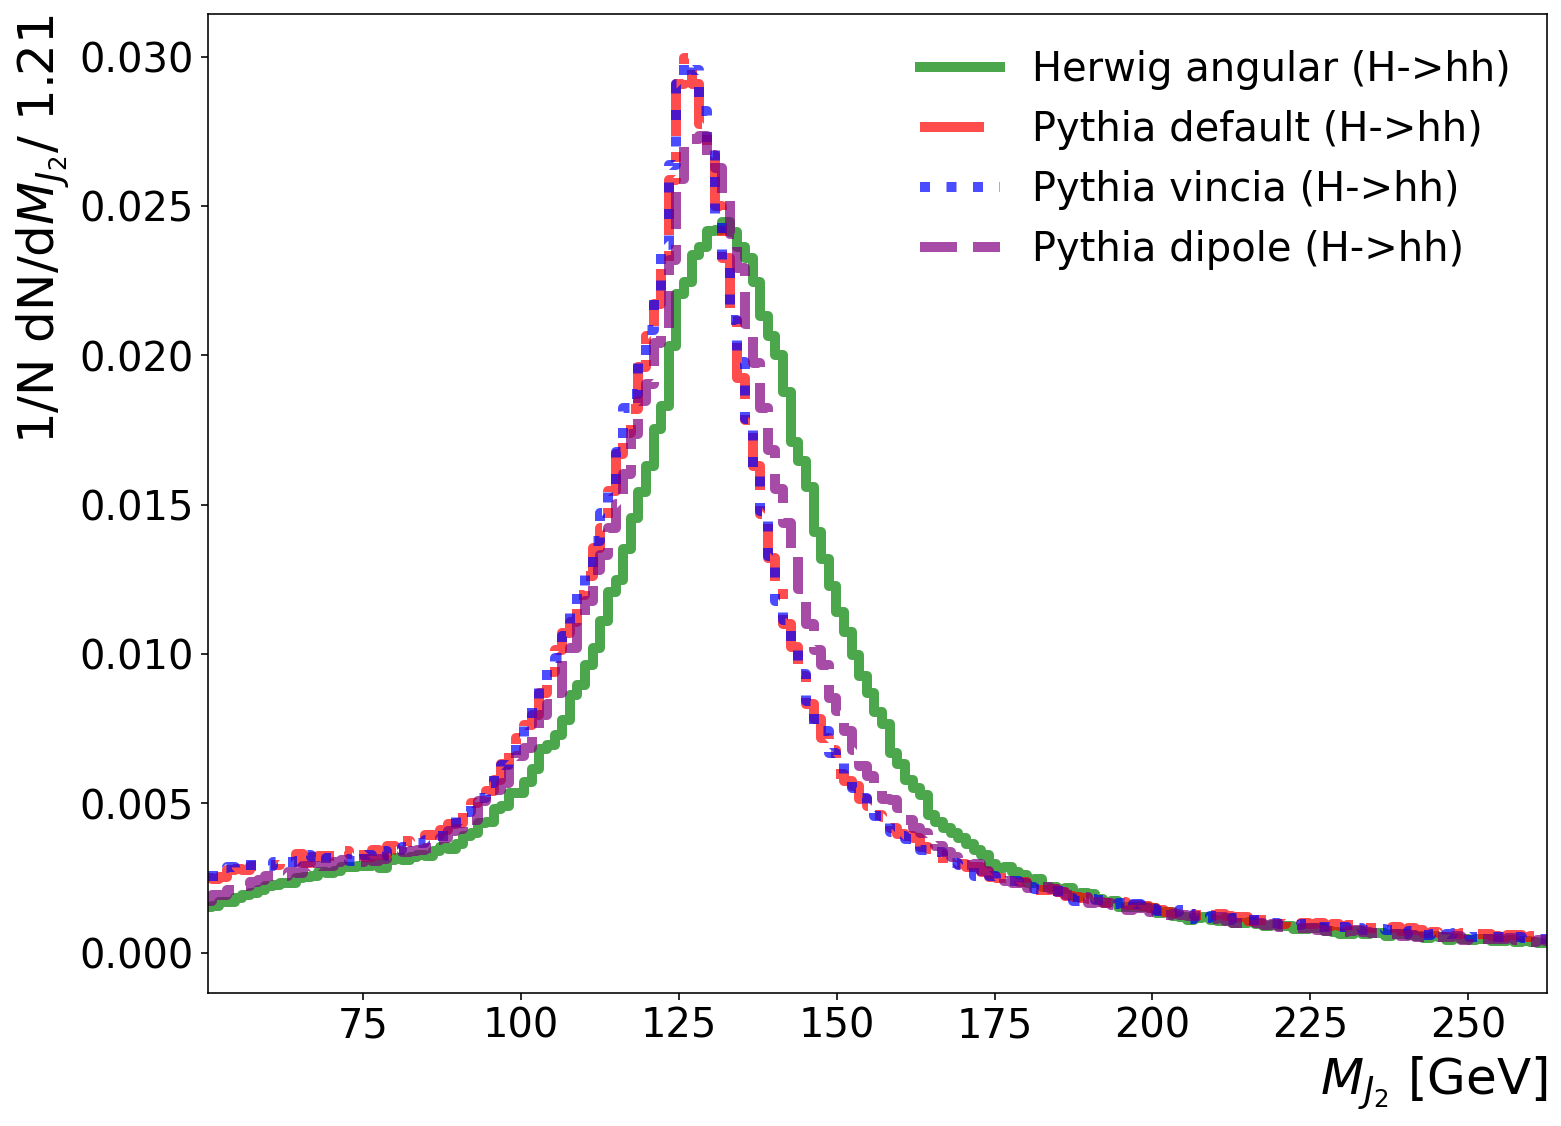

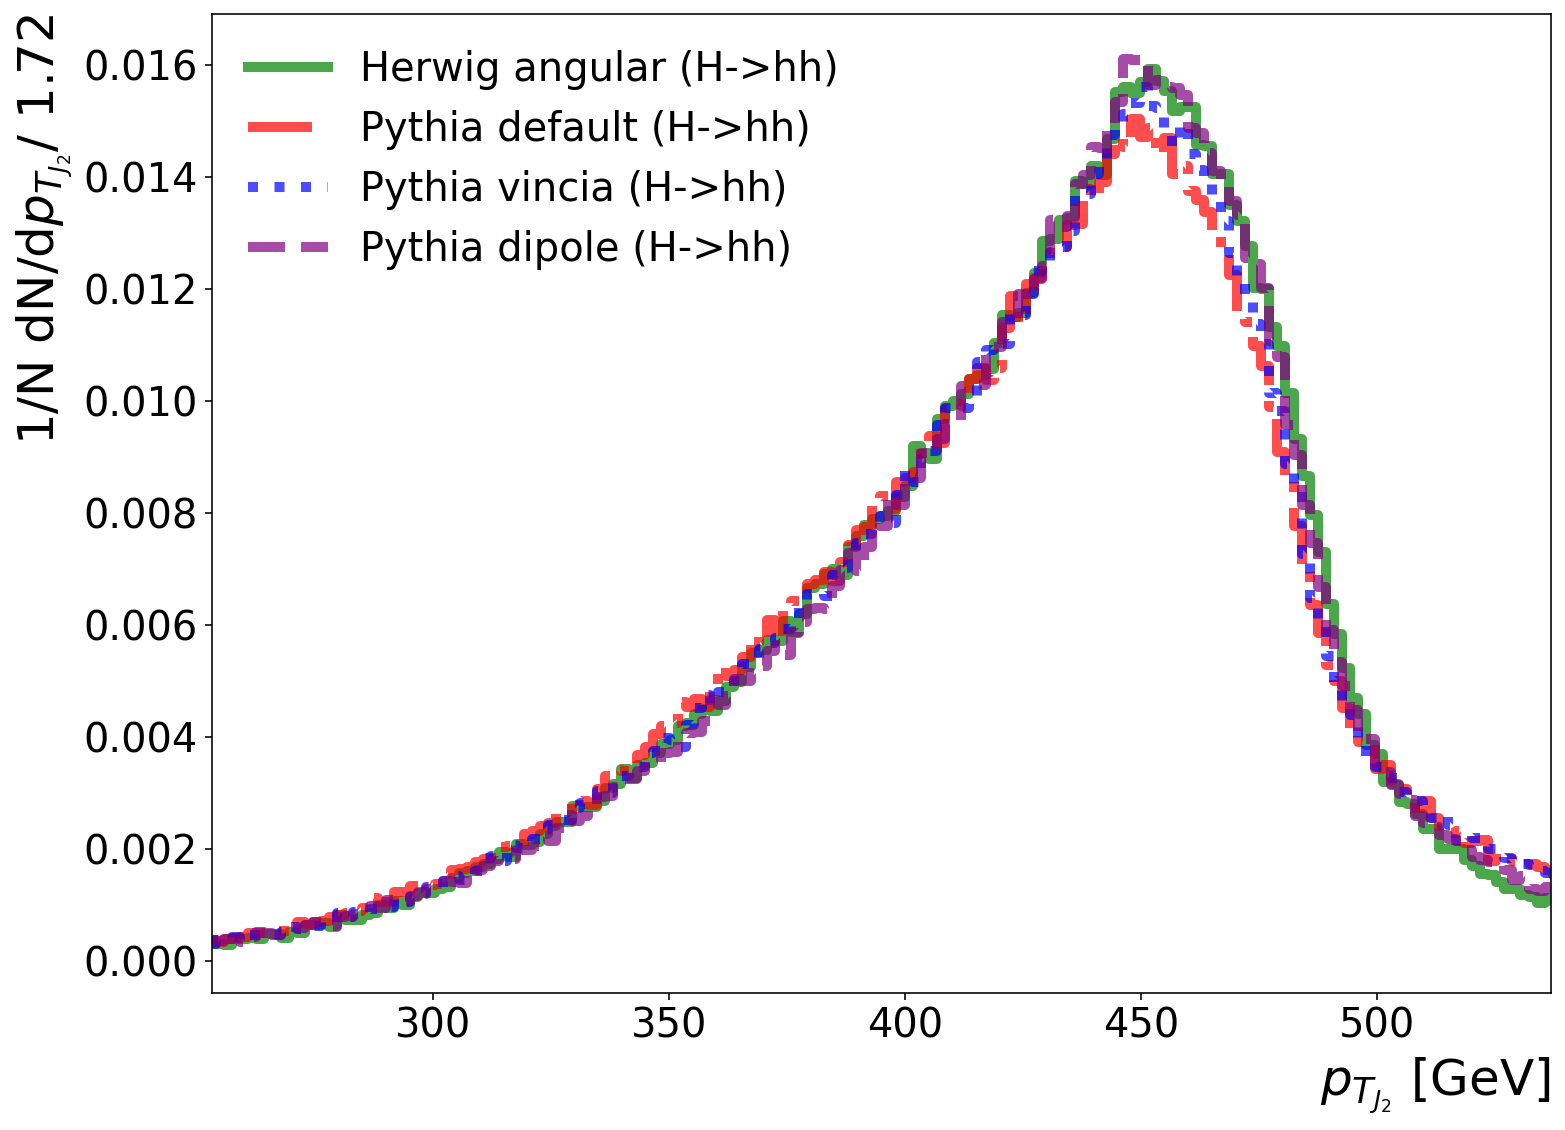

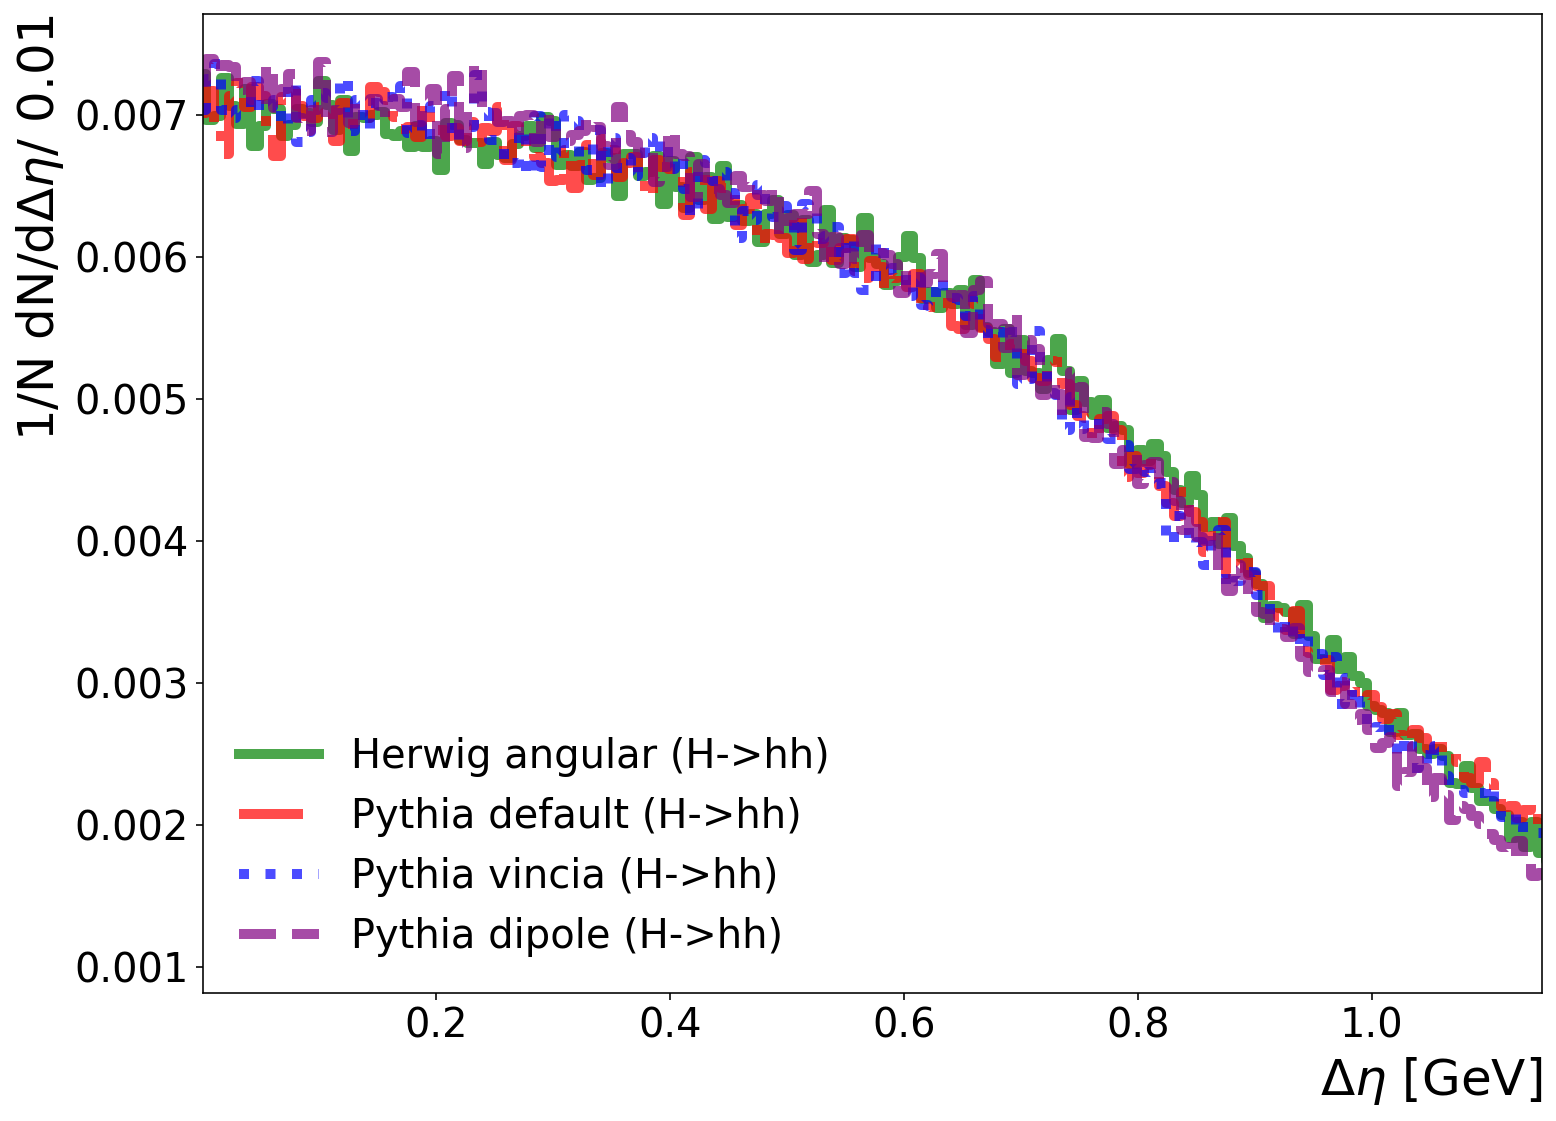

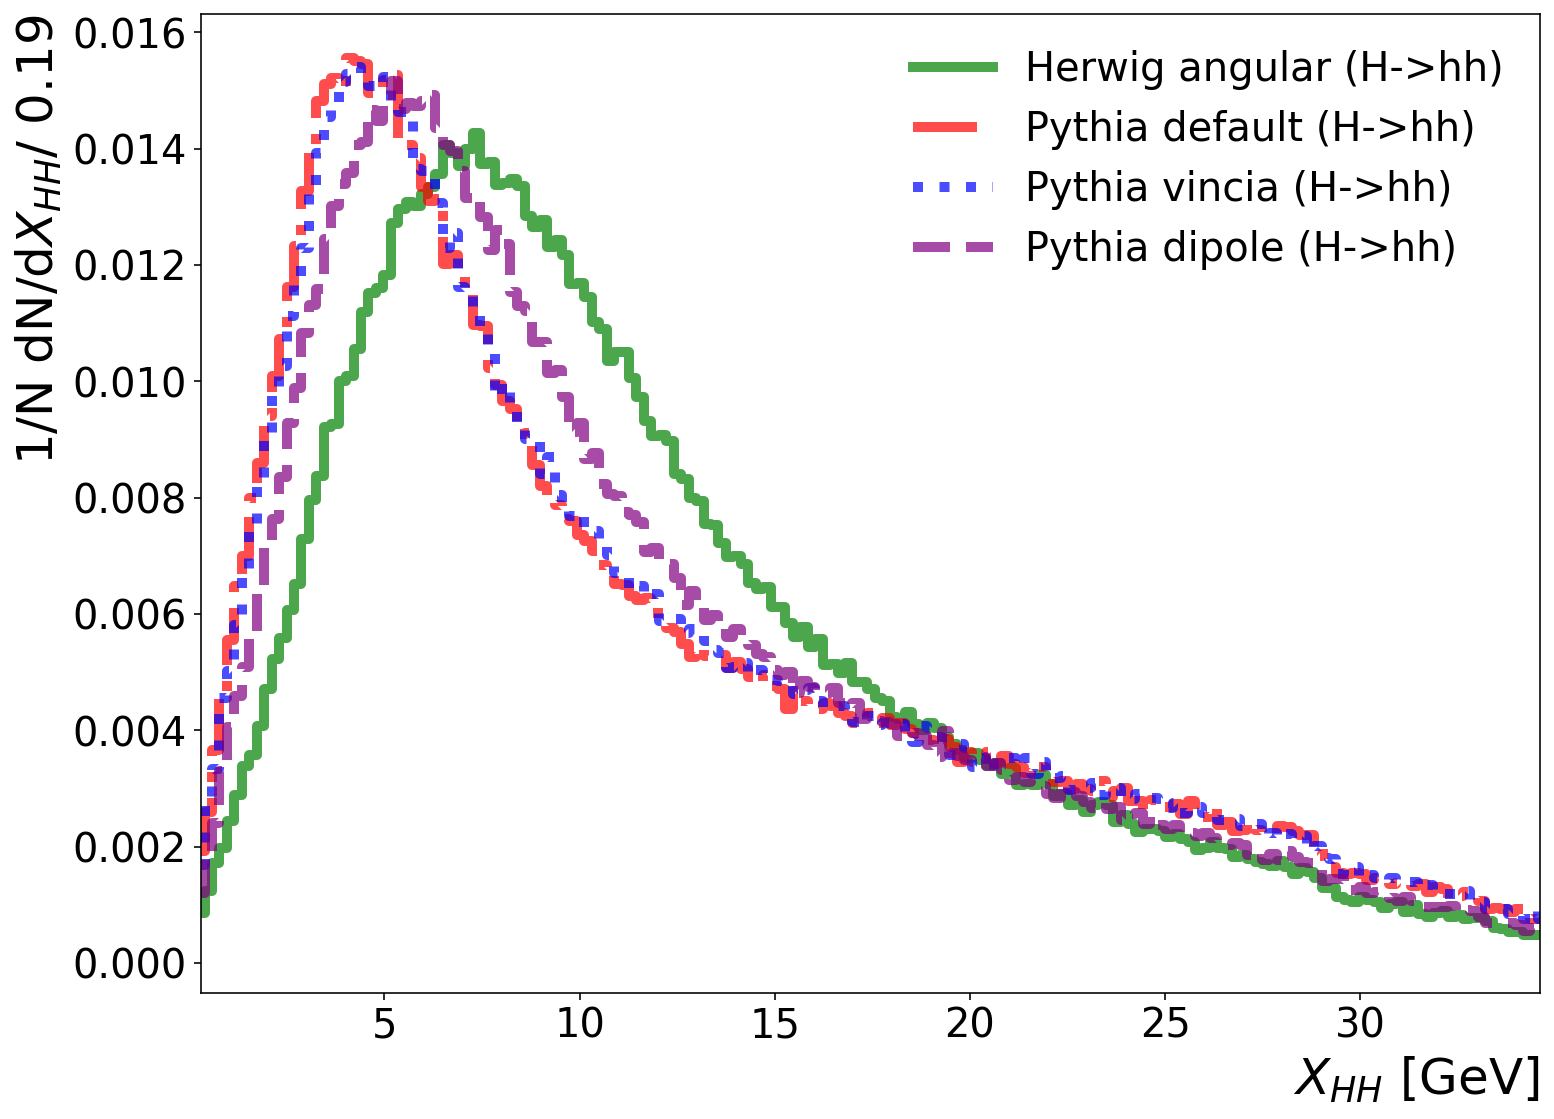

In [22]:
jet_kinematic = [
                  "MJJ_0","MJ1_0","PTJ1_0","MJ2_0","PTJ2_0",
                  "delta_eta_0", "XHH_0"
                ]
jet_kinematic_name = [
                       "$M_{JJ}$", "$M_{J_1}$", "$p_{T_{J_1}}$", "$M_{J_2}$", "$p_{T_{J_2}}$",
                       "$\Delta\eta$", "$X_{HH}$"
                     ]


for index, kinematic in enumerate(jet_kinematic):
    Kinematic= TotalSamples.H_only(kinematic)


    fig, ax = plt.subplots(1,1, figsize=(12,9))
    for i, element in enumerate(Kinematic):

#         xmin, xmax = 0, np.max(process)
        xmin = np.sort(Kinematic[0])[int(len(Kinematic[0])*1/2000)] 
        xmax = np.sort(Kinematic[0])[int(len(Kinematic[0])*1990/2000)]
        length = np.linspace(xmin,xmax,201)
        HIST(element, length, title,colors[i],linestyle[i])
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        plt.xlim((xmin,xmax*0.9))
        plt.xlabel(jet_kinematic_name[index]+" [GeV]", fontsize=25,horizontalalignment='right',x=1) 


    # plt.ylim((0.))
    unit = np.around((xmax-xmin)/200, decimals=2)
    
    plt.ylabel("1/N dN/d" +jet_kinematic_name[index]+ "/ "+str(unit) , fontsize=25, horizontalalignment='right',y=1)
    # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
    plt.show()  

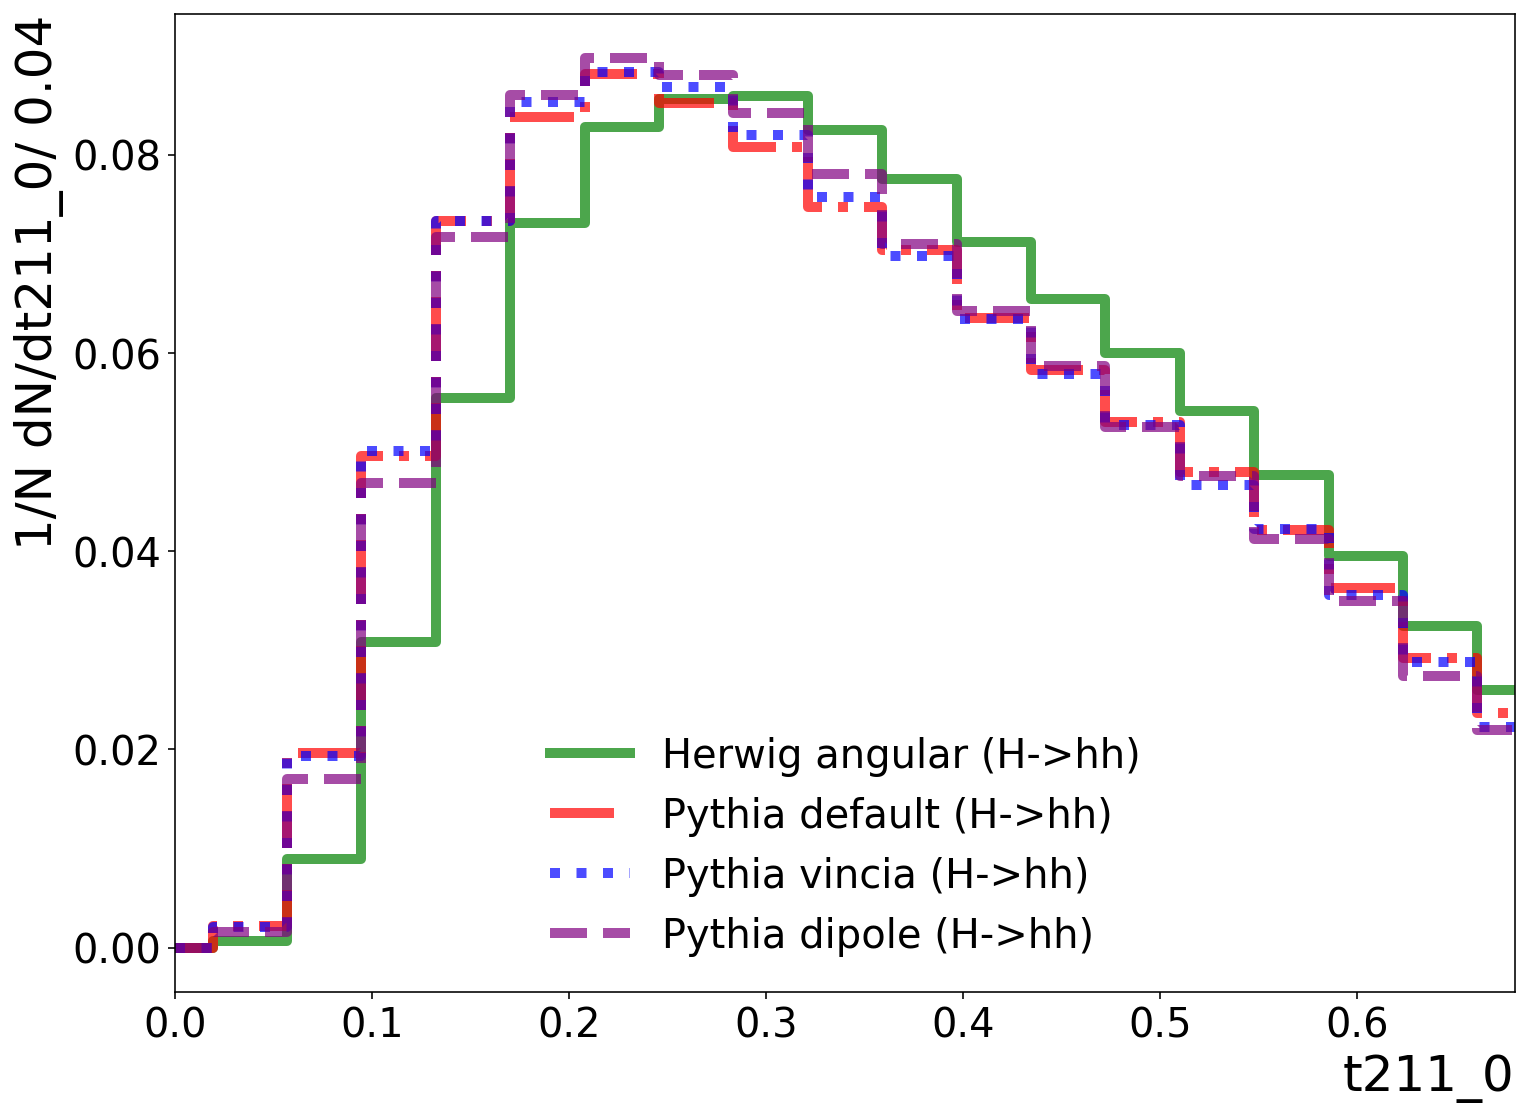

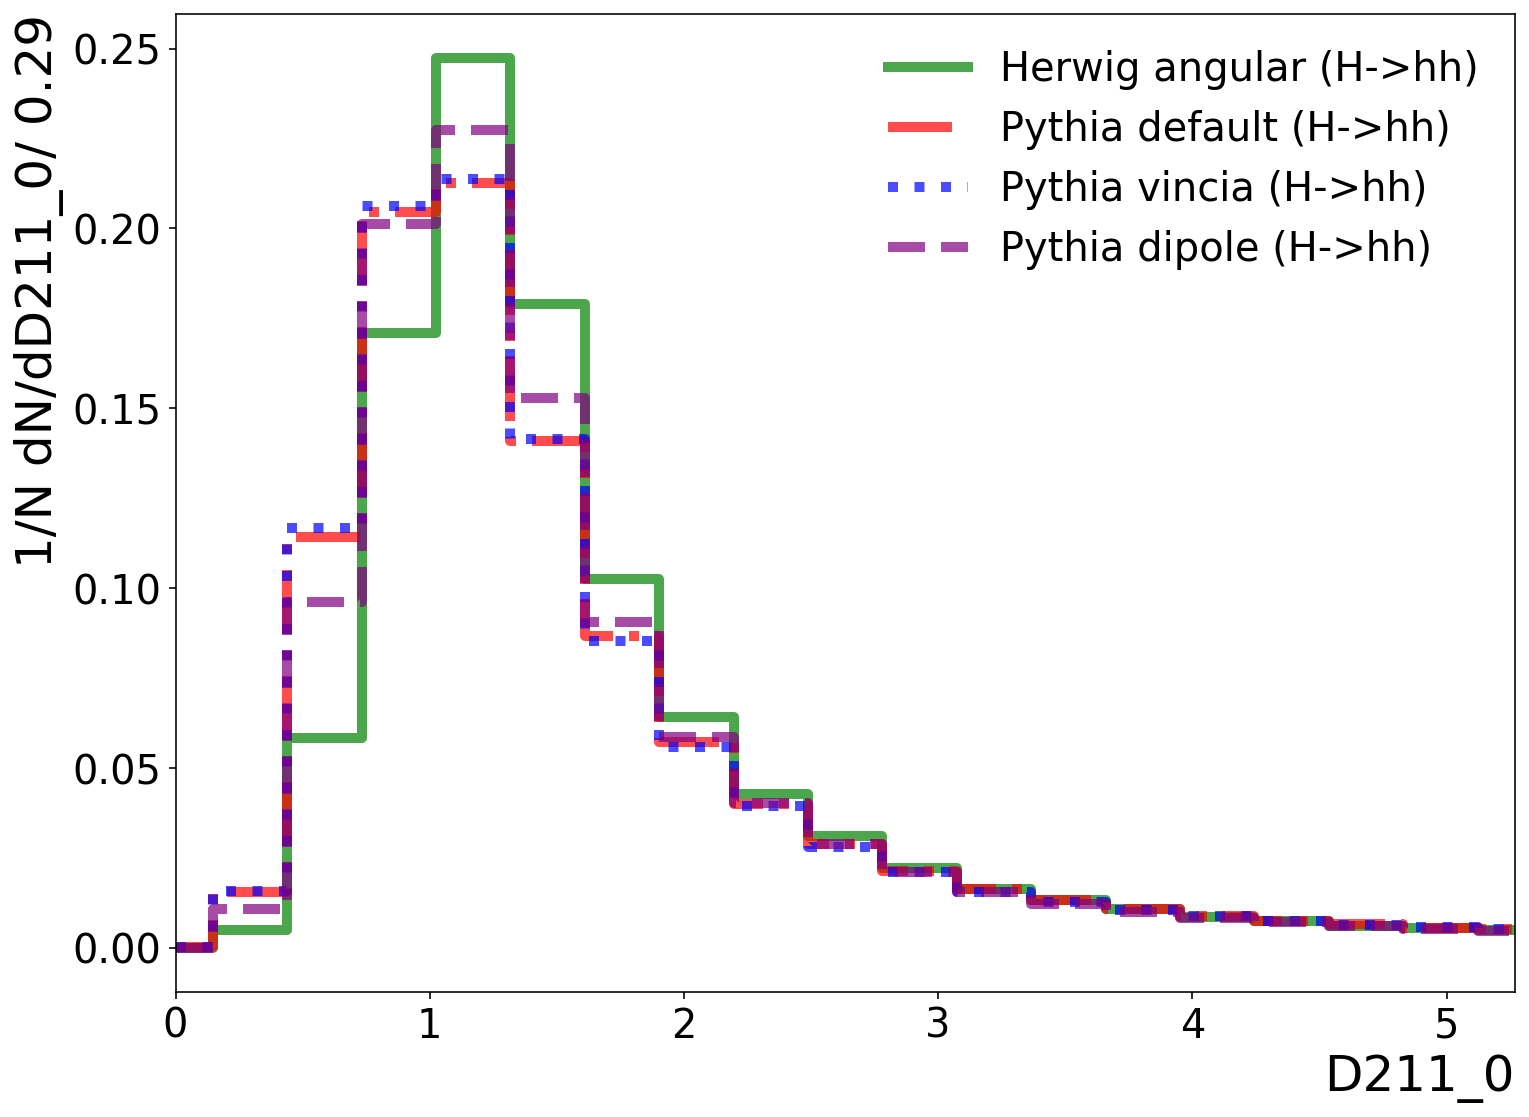

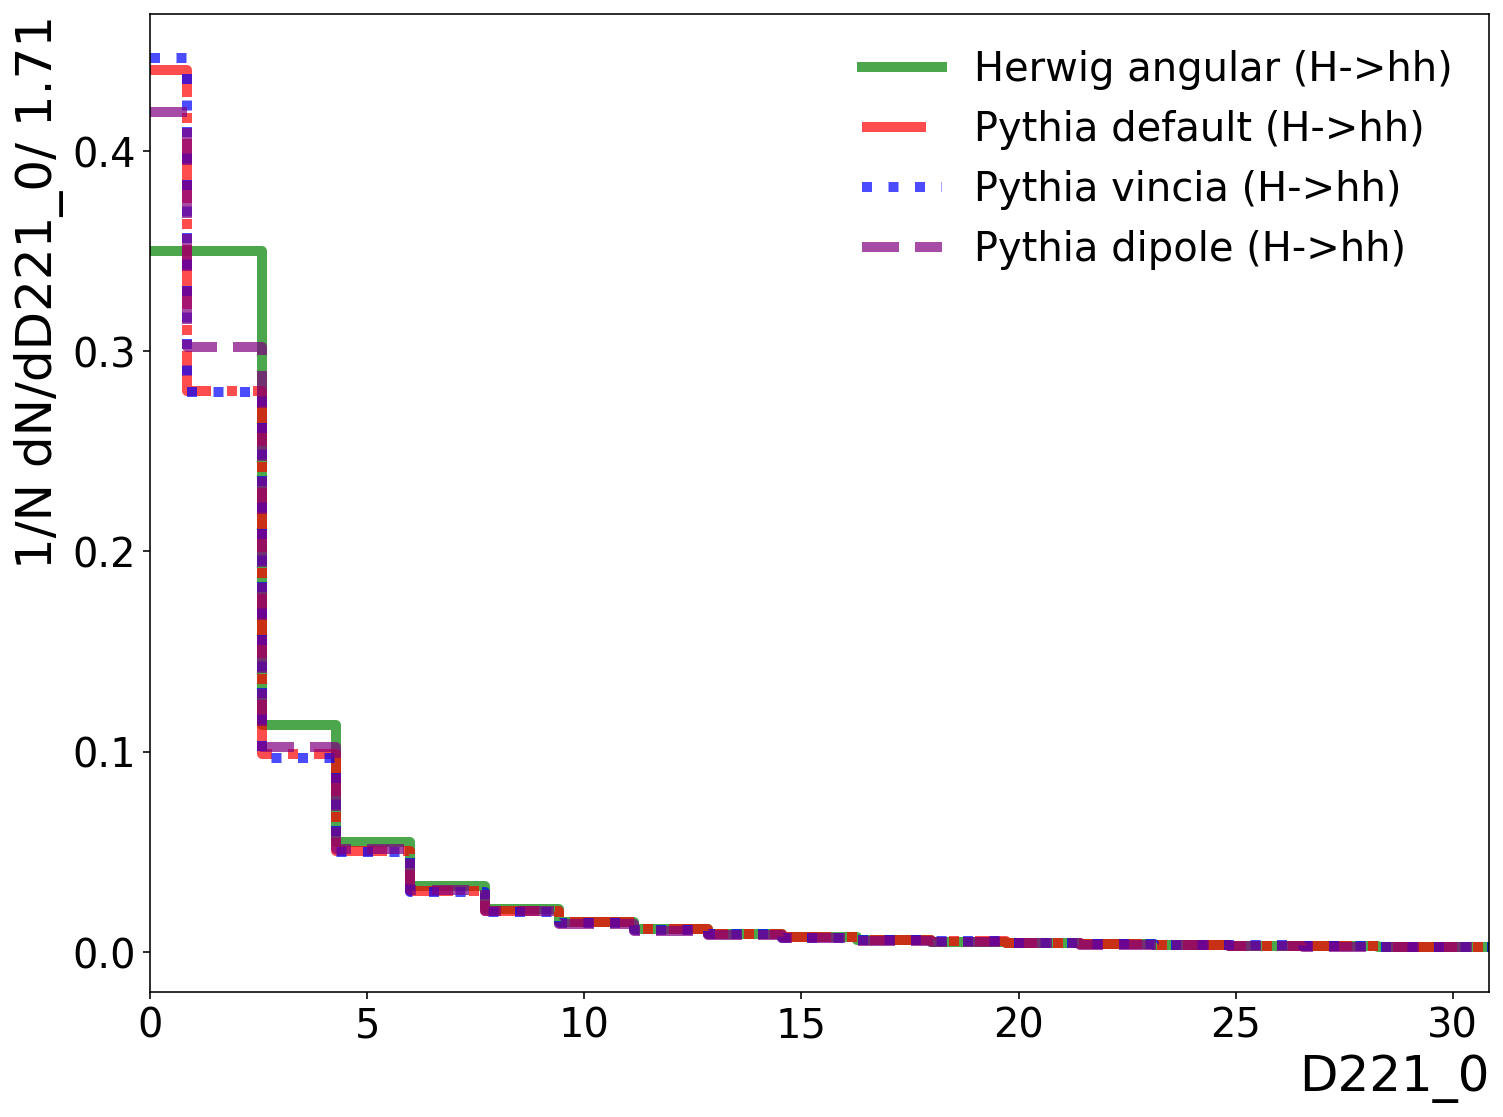

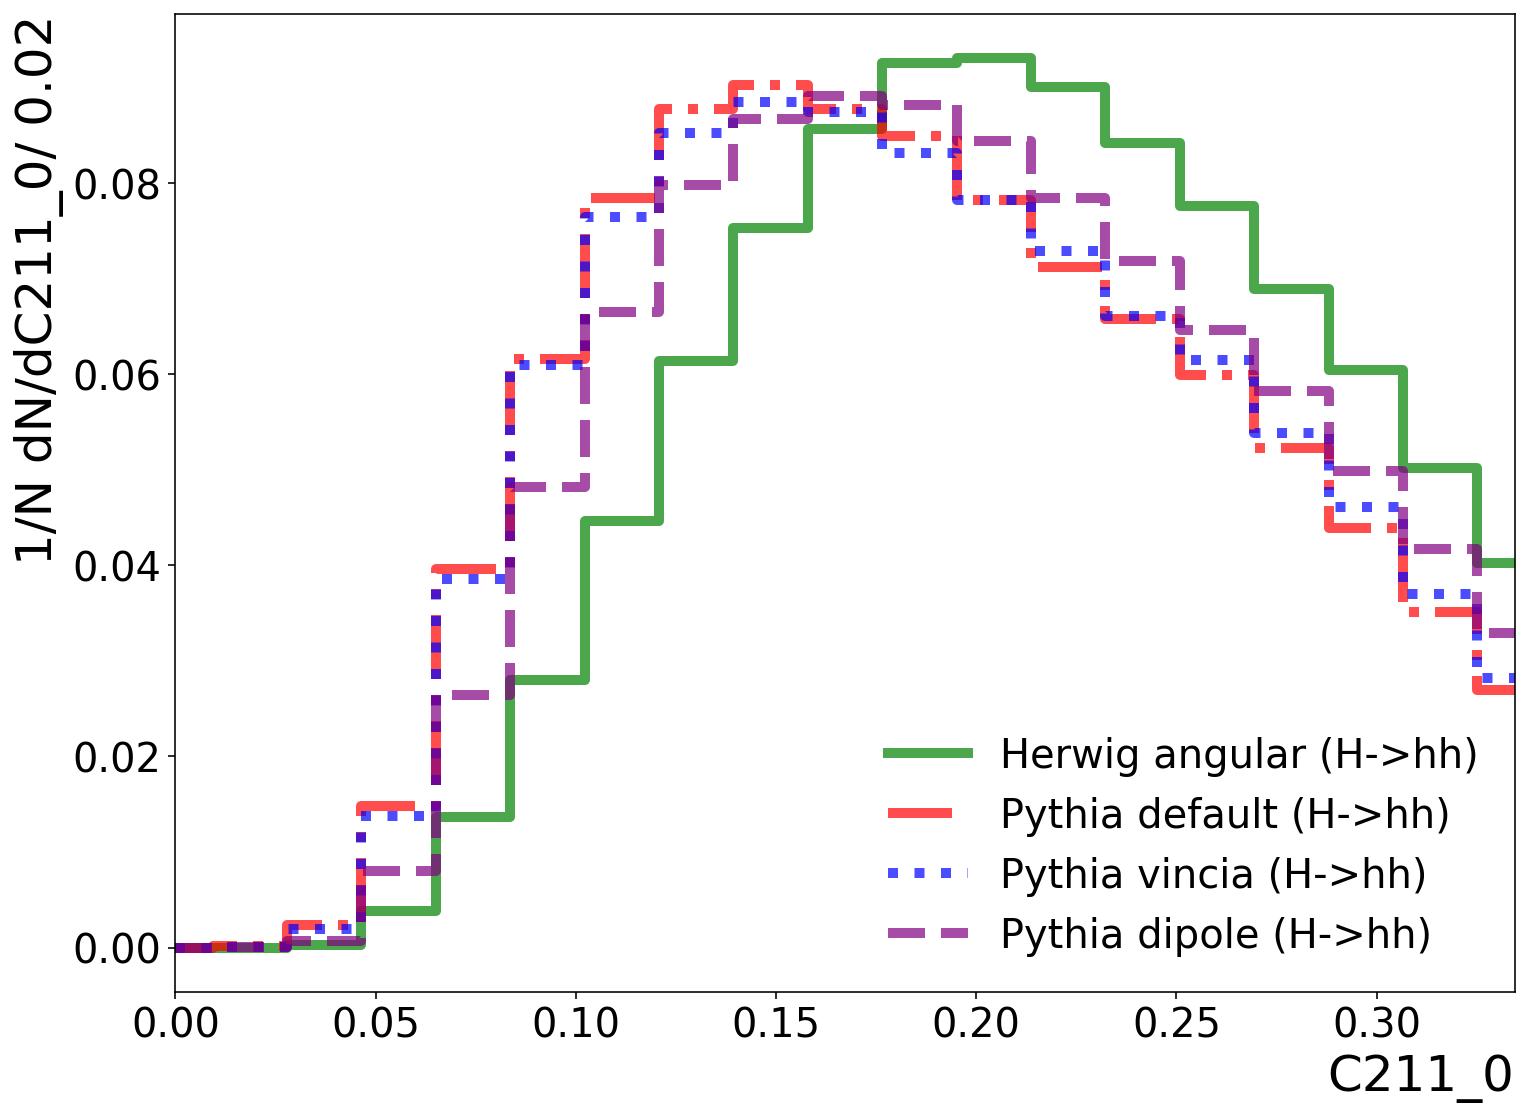

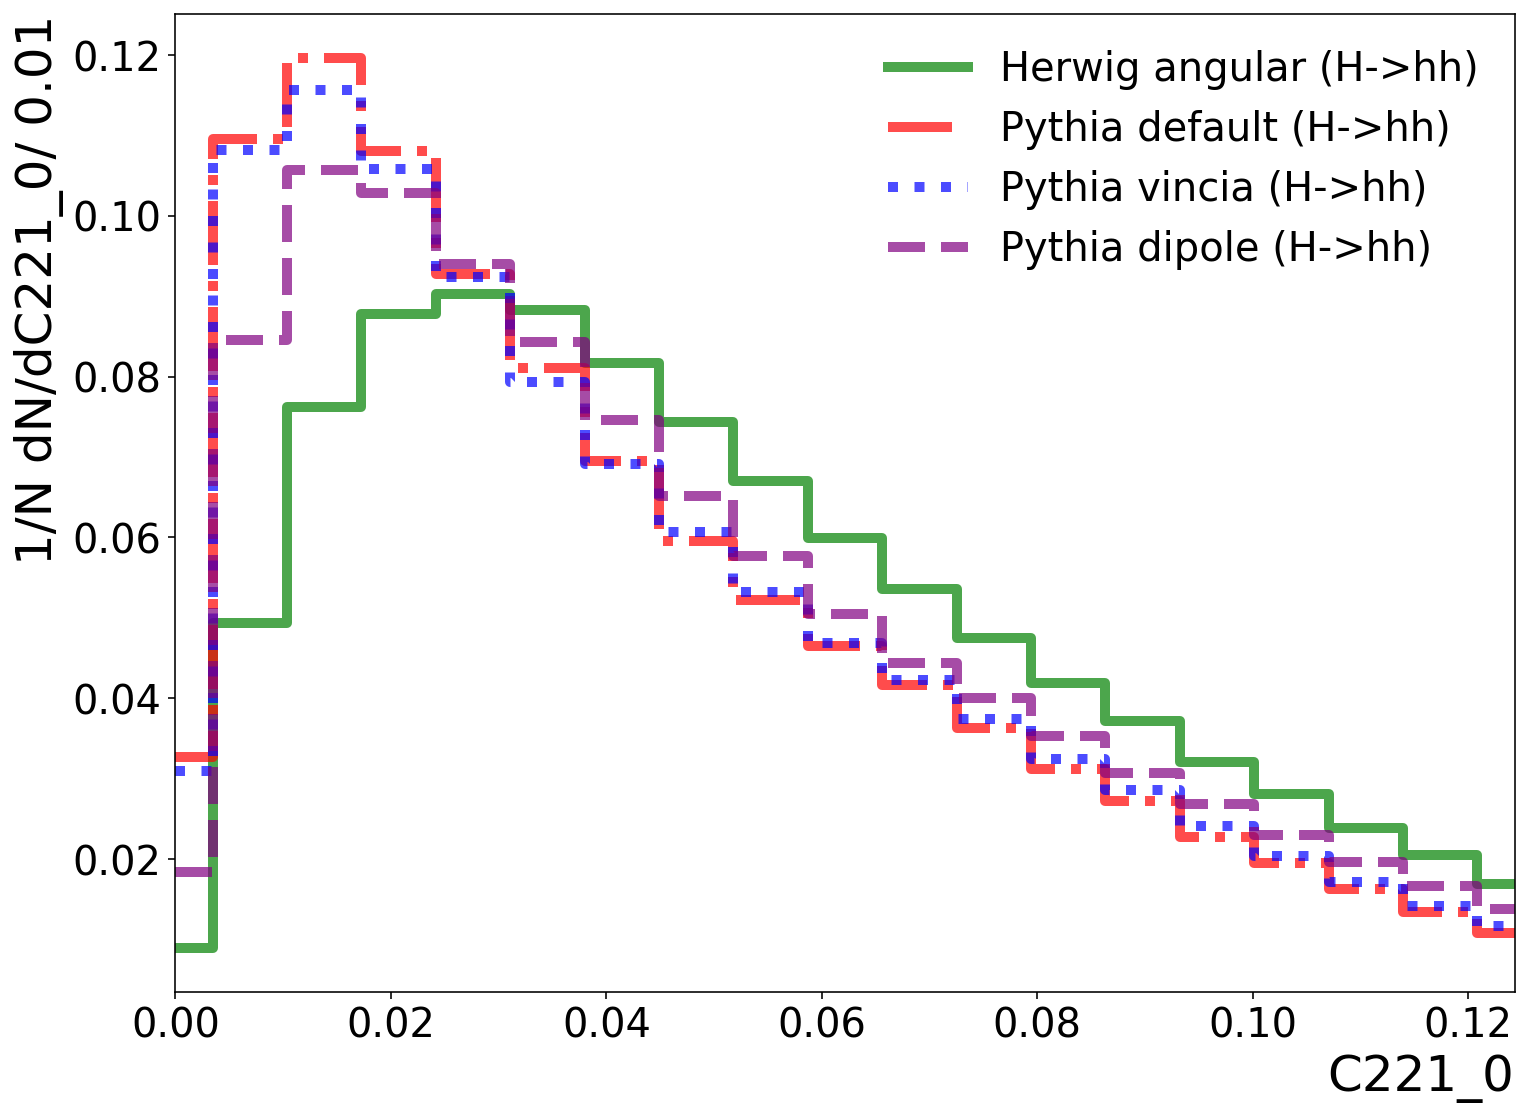

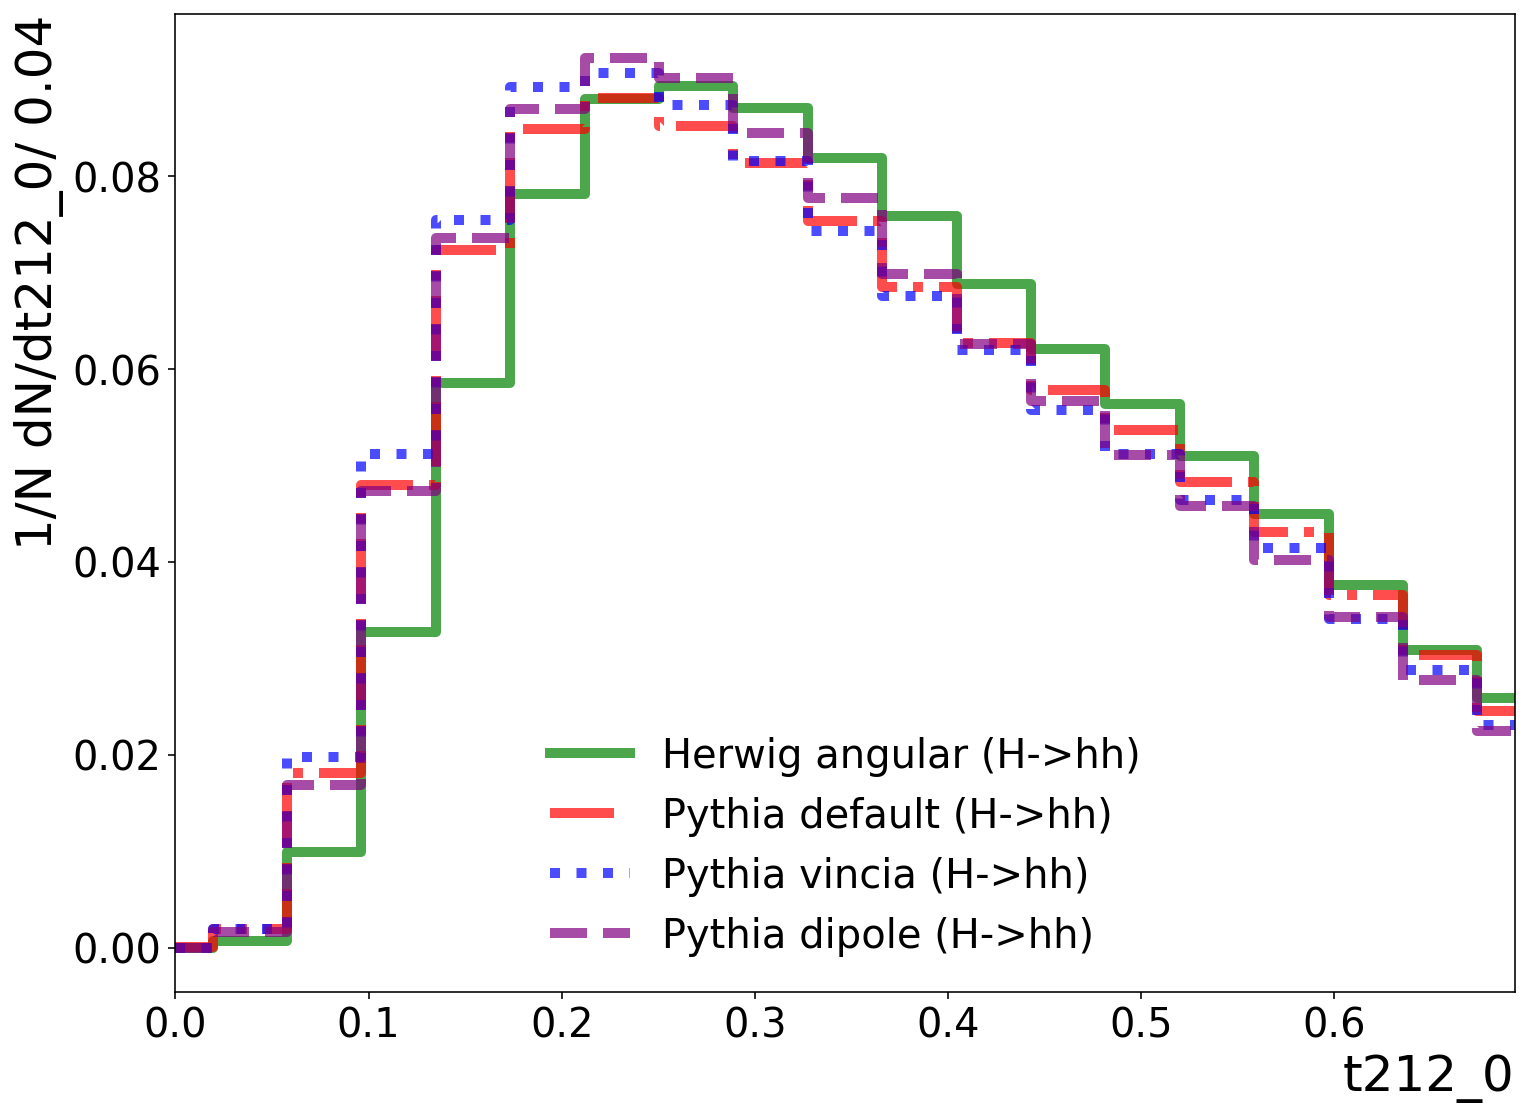

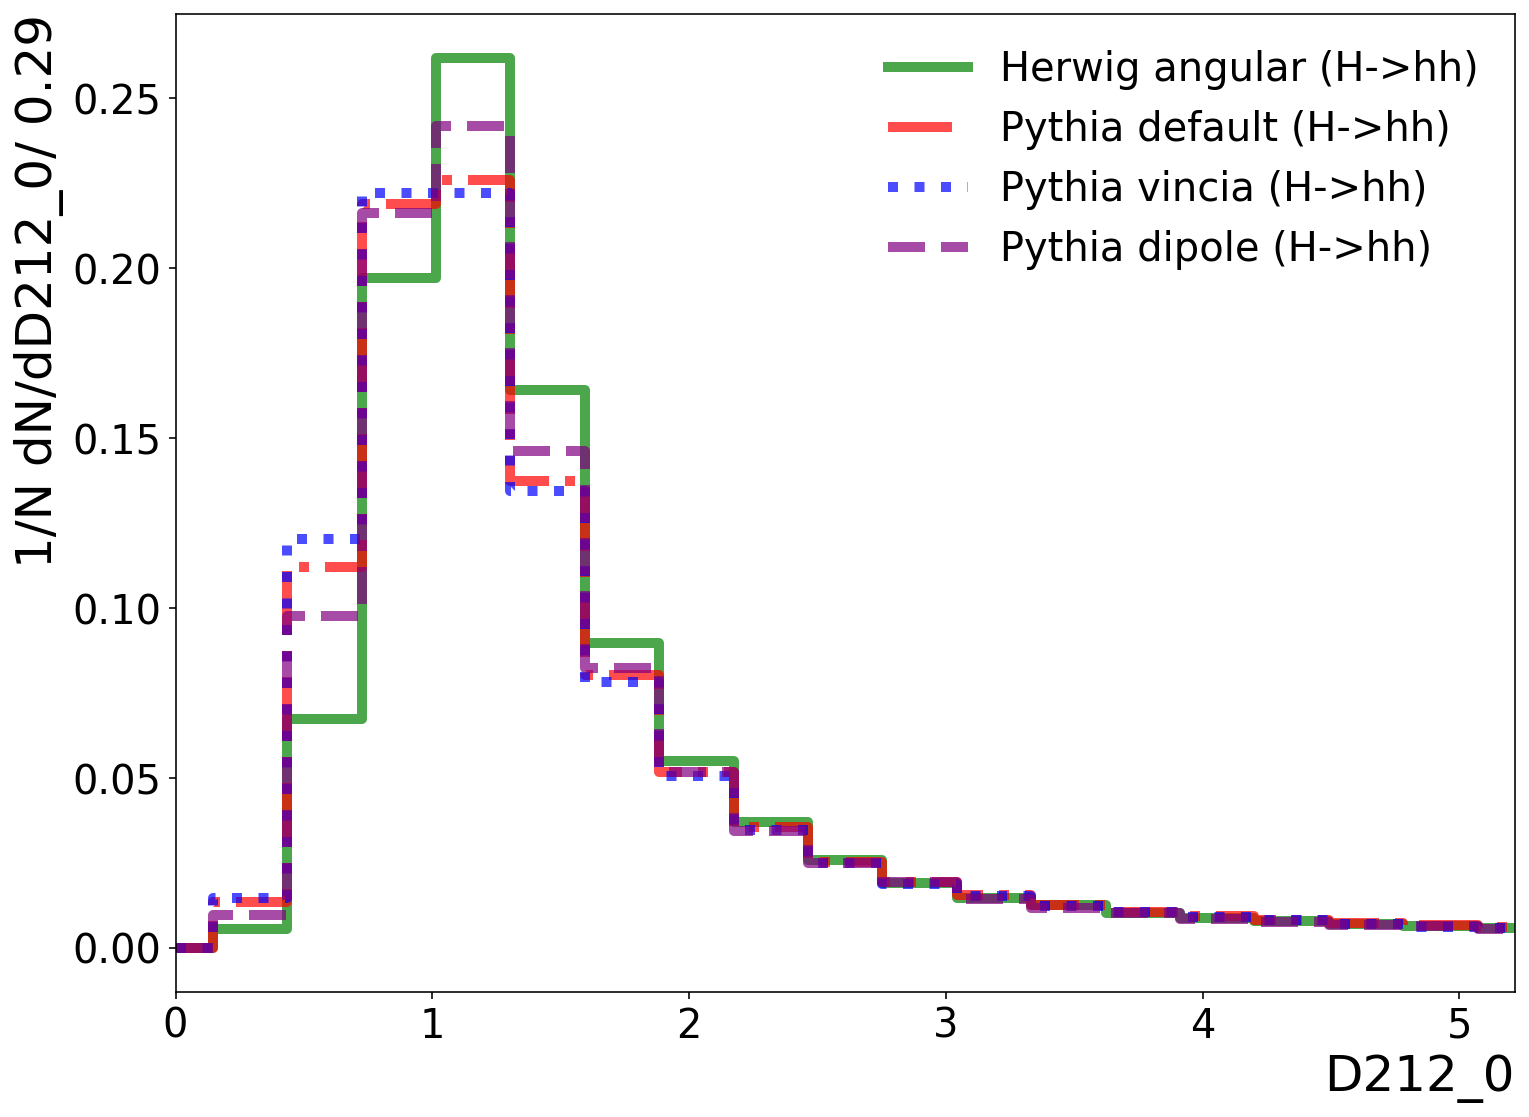

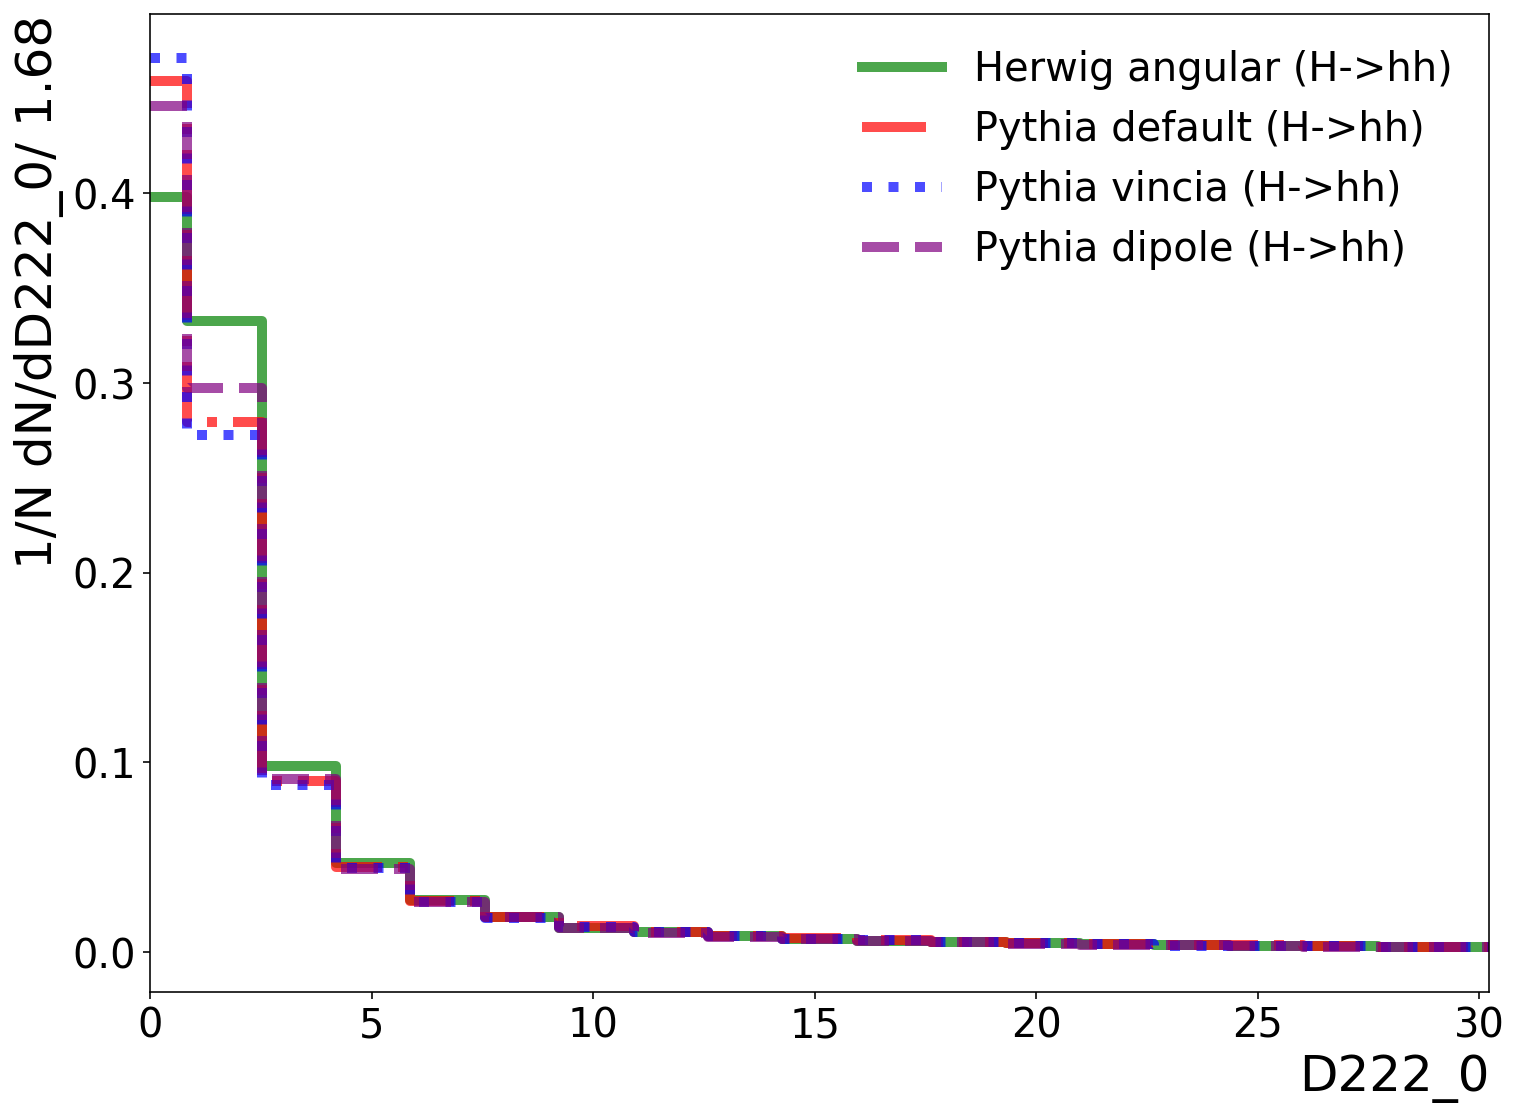

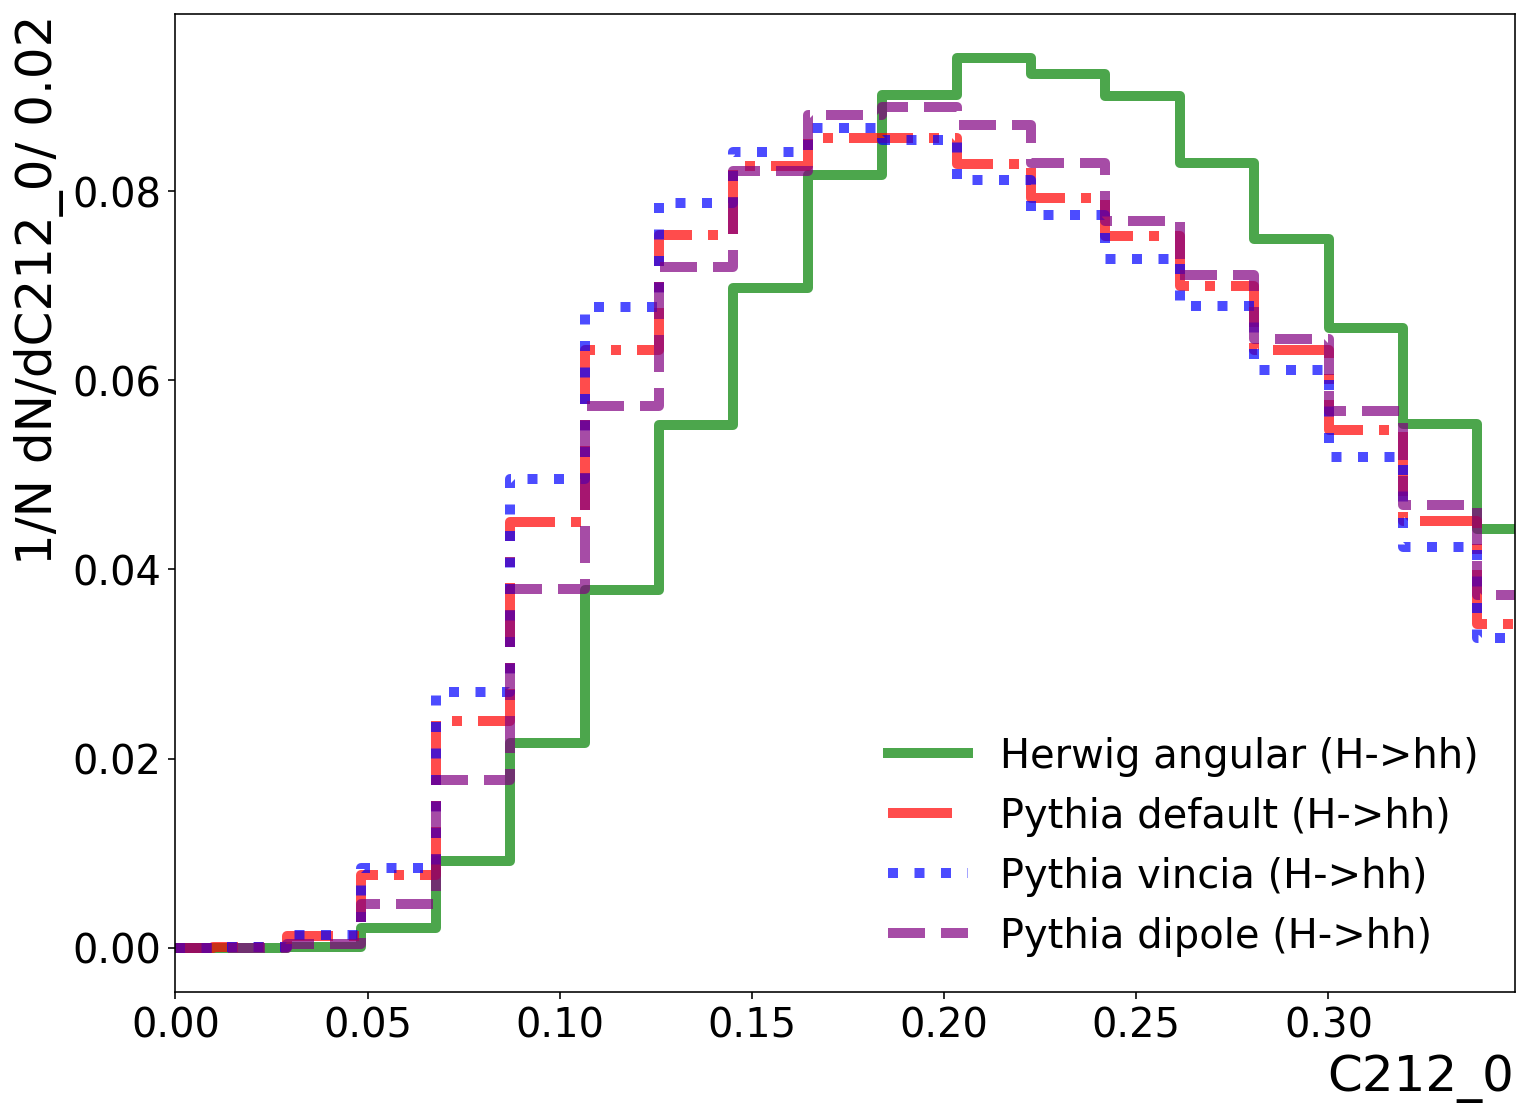

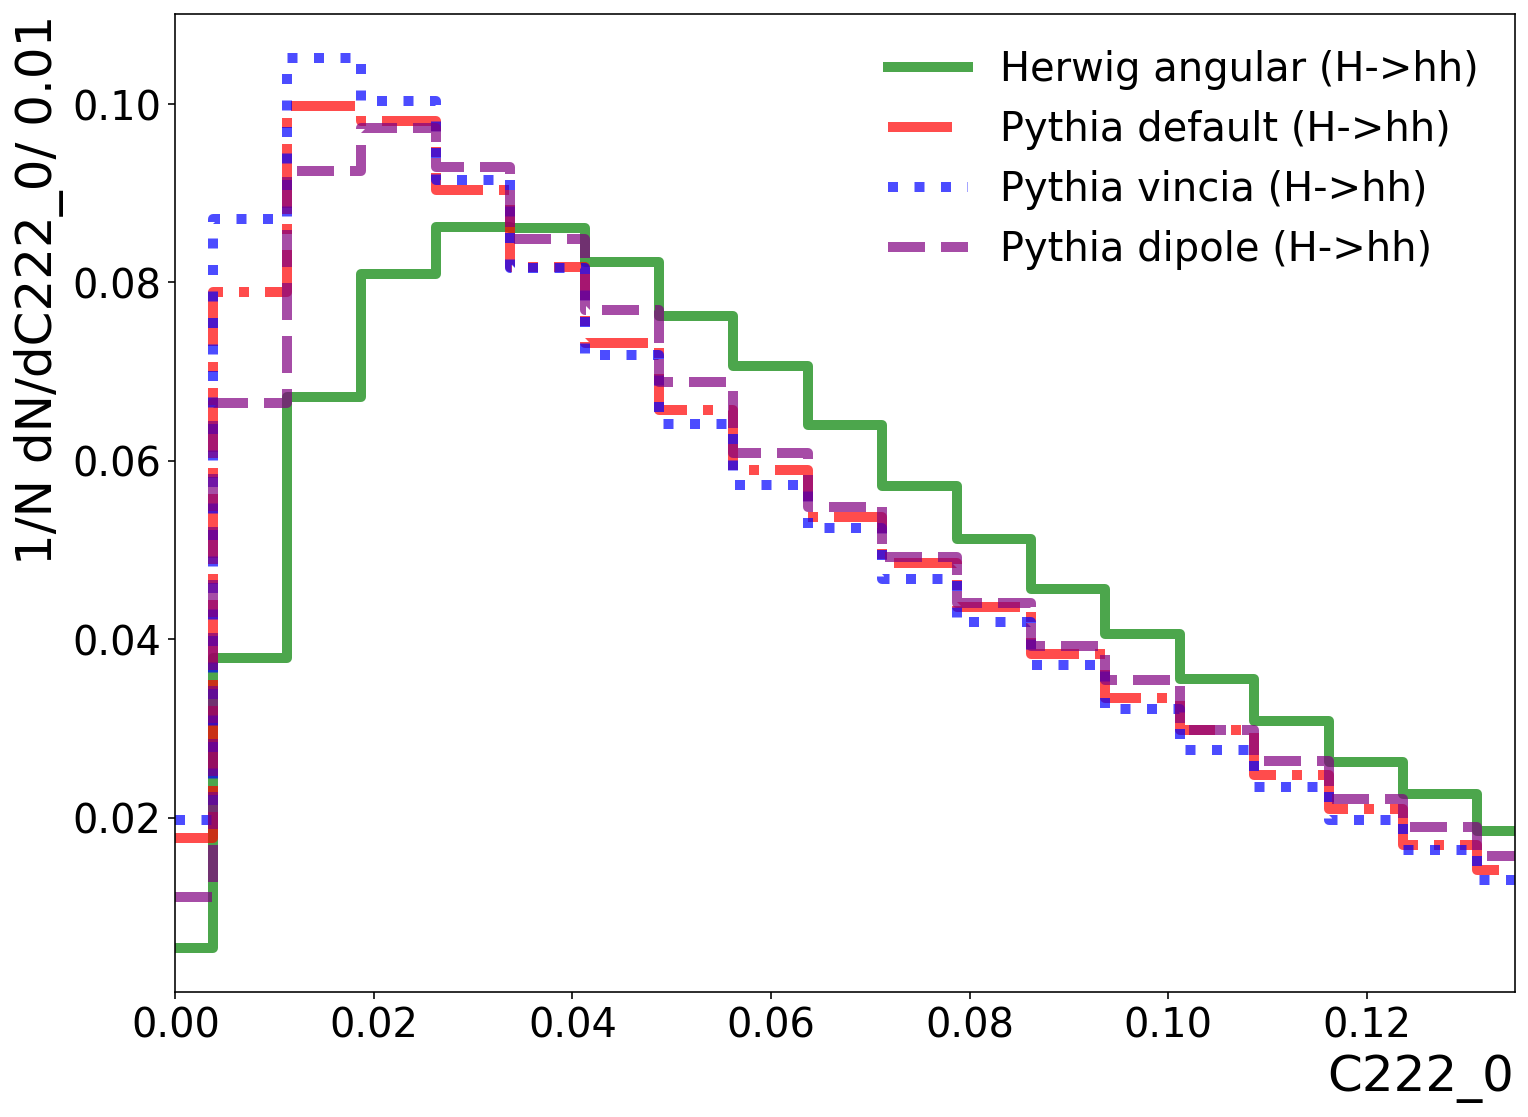

In [23]:
jet_substructure = [
                    "t211_0","D211_0","D221_0","C211_0","C221_0",
                    "t212_0","D212_0","D222_0","C212_0","C222_0"
                   ]
jet_substructure_name = [
                    "t211_0","D211_0","D221_0","C211_0","C221_0",
                    "t212_0","D212_0","D222_0","C212_0","C222_0"
                   ]


for index, jss in enumerate(jet_substructure):
    JSS= TotalSamples.H_only(jss)


    fig, ax = plt.subplots(1,1, figsize=(12,9))
    for i, element in enumerate(JSS):

#         xmin, xmax = 0, np.max(process)
        xmin, xmax = 0, np.sort(JSS[0])[int(len(JSS[0])*19/20)]
        length = np.linspace(xmin,xmax,21)
        HIST(element, length, title,colors[i],linestyle[i])
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        plt.xlim((0,xmax*0.9))
        plt.xlabel(jet_substructure_name[index], fontsize=25,horizontalalignment='right',x=1) 


    # plt.ylim((0.))
    unit = np.around(xmax/20, decimals=2)
    
    plt.ylabel("1/N dN/d" +jet_substructure_name[index]+ "/ "+str(unit), fontsize=25, horizontalalignment='right',y=1)
    # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
    plt.show()  